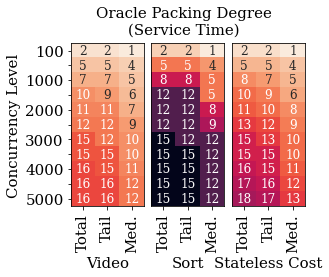

In [264]:
#prediction for best time
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pylab as mp
import statistics 
from matplotlib import gridspec
import statistics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import numpy as np
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Roboto']

with open(r'/home/rohan/Downloads/scaling/sc/exp1/statelesscost/scale_time.txt') as f:
    statelesscost_scale=[float(x.strip()) for x in f.readlines()]
with open(r'/home/rohan/Downloads/scaling/sc/exp1/sort/scale_time.txt') as f:
    sort_scale=[float(x.strip()) for x in f.readlines()]
with open(r'/home/rohan/Downloads/scaling/sc/exp1/video/scale_time.txt') as f:
    video_scale=[float(x.strip()) for x in f.readlines()]
concurrency_list=[100,500,1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
scaling_time=[statistics.median([statelesscost_scale[i],sort_scale[i],video_scale[i]]) for i in range(len(sort_scale))]
degree=4
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(np.array(concurrency_list).reshape((-1, 1)), np.array(scaling_time))

appname=['video', 'sort', 'statelesscost']
n_max=[40, 15, 30]
prediction_list=[100,500,1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
app_pred_list=[[] for i in range(len(appname))]
for app in appname:
    with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/'+app+'/parallel.txt') as f:
                    parallel=[float(x.strip()) for x in f.readlines()]
    with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/'+app+'/service_time.txt') as f:
                    service=[float(x.strip()) for x in f.readlines()]
    for curr in prediction_list:
        median=int(curr/2.0)
        tail=int(0.90*curr)
        net=curr
        metric_list=[net, tail, median]
        for m in metric_list:
            i=1
            ll=[]
            while i <= n_max[appname.index(app)]:
                scale=int(m/i)
                if m%i !=0:
                    scale+=1
                pred=polyreg.predict(np.array([scale]).reshape((-1,1)))  
                if pred<0:
                    pred=0
                service_time=service[parallel.index(i)]
                ll.append(service_time+pred)
                i+=1
            app_pred_list[appname.index(app)].append(ll.index(min(ll))+1)
        
        
#plotting part
prediction_list=[100,'',1000, '', 2000, '', 3000, '', 4000, '', 5000]
metric_list=['Total', 'Tail', 'Med.']
appname=['Video', 'Sort', 'Stateless Cost']
max_packing=[40, 15, 30]
fig = plt.figure(figsize=(1.4*3, 3)) 
mp.subplots_adjust(wspace=0.1)

#v_max=[max(i) for i in app_pred_list]
#v_min=[min(i) for i in app_pred_list]
v_max=[40,15,30]
v_min=[1,1,1]

j=0
while j < len(appname):
    pred_list=np.asarray(app_pred_list[j])
    pred_data=np.reshape(pred_list,(len(prediction_list),len(metric_list)))
    ax = plt.subplot(1, len(appname),j+1)
    cmap = sns.cm.rocket_r
    res=sns.heatmap(pred_data,linewidth=0.0,cbar=False, cmap=cmap, annot=True, annot_kws={"size": 12},vmin=v_min[j], vmax=v_max[j])
    for _, spine in res.spines.items():
        spine.set_visible(True)
    ax.set_axisbelow(True)
    if j==0:
        ax.set_ylabel("Concurrency Level",fontsize=15)
        ax.set_yticklabels([i for i in prediction_list], rotation=360)
    else:
        ax.set_yticklabels([])
        ax.set_yticks([])
    #if j==int(len(appname)/2):
    #    ax.set_xlabel("Service Time",fontsize=15)
    ax.set_xlabel(appname[j], fontsize=15, y=-0.2)
    ax.set_xticklabels(metric_list, rotation=90)
    ax.tick_params(labelsize=15)
    #ax.set_title(appname[j]+"\n Max. Pack.\nDeg. "+str(max_packing[j]))
    j+=1
    
plt.suptitle("Oracle Packing Degree\n(Service Time)", fontsize=15, y=1.05)

mp.savefig(r'/home/rohan/Downloads/scaling/sc/figures/spatial_time.pdf', bbox_inches='tight')

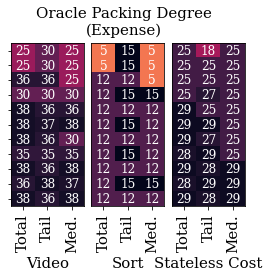

In [267]:
#prediction for best cost
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pylab as mp
import statistics 
from matplotlib import gridspec
import statistics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import numpy as np
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Roboto']
cost_of_lambda=0.0001667 ##lambda cost per sec 10 GB
#variants_time
with open(r'/home/rohan/Downloads/scaling/sc/exp1/statelesscost/scale_time.txt') as f:
    statelesscost_scale=[float(x.strip()) for x in f.readlines()]
with open(r'/home/rohan/Downloads/scaling/sc/exp1/sort/scale_time.txt') as f:
    sort_scale=[float(x.strip()) for x in f.readlines()]
with open(r'/home/rohan/Downloads/scaling/sc/exp1/video/scale_time.txt') as f:
    video_scale=[float(x.strip()) for x in f.readlines()]
concurrency_list=[100,500,1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
scaling_time=[statistics.median([statelesscost_scale[i],sort_scale[i],video_scale[i]]) for i in range(len(sort_scale))]
degree=4
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(np.array(concurrency_list).reshape((-1, 1)), np.array(scaling_time))

appname=['video', 'sort', 'statelesscost']
n_max=[40, 15, 30]
prediction_list=[100,500,1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
app_pred_list=[[] for i in range(len(appname))]
for app in appname:
    with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/'+app+'/parallel.txt') as f:
                    parallel=[float(x.strip()) for x in f.readlines()]
    with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/'+app+'/service_time.txt') as f:
                    service=[float(x.strip()) for x in f.readlines()]
    for curr in prediction_list:
        median=int(curr/2.0)
        tail=int(0.90*curr)
        net=curr
        metric_list=[net, tail, median]
        for m in metric_list:
            i=1
            ll=[]
            while i <= n_max[appname.index(app)]:
                scale=int(m/i)
                if m%i !=0:
                    scale+=1
                pred=polyreg.predict(np.array([scale]).reshape((-1,1)))  
                if pred<0:
                    pred=0
                service_time=service[parallel.index(i)]
                
                if m%i==0:##
                    cost_cost=service_time*scale*cost_of_lambda ##
                else:##
                    cost_cost=service_time*(scale+1)*cost_of_lambda ##
                ##ll.append(service_time+pred)
                ll.append(cost_cost)
                
                i+=1
            app_pred_list[appname.index(app)].append(ll.index(min(ll))+1)
        
        
#plotting part
prediction_list=[100,'',1000, '', 2000, '', 3000, '', 4000, '', 5000]
metric_list=['Total', 'Tail', 'Med.']
appname=['Video', 'Sort', 'Stateless Cost']
max_packing=[40, 15, 30]
fig = plt.figure(figsize=(1.4*3, 3)) 
mp.subplots_adjust(wspace=0.1) 

#v_max=[max(i) for i in app_pred_list]
#v_min=[min(i) for i in app_pred_list]
v_max=[40,15,30]
v_min=[1,1,1]

j=0
while j < len(appname):
    pred_list=np.asarray(app_pred_list[j])
    pred_data=np.reshape(pred_list,(len(prediction_list),len(metric_list)))
    ax = plt.subplot(1, len(appname),j+1)
    cmap = sns.cm.rocket_r
    res=sns.heatmap(pred_data,linewidth=0.0,cbar=False, cmap=cmap, annot=True, annot_kws={"size": 12},vmin=v_min[j], vmax=v_max[j])
    for _, spine in res.spines.items():
        spine.set_visible(True)
    ax.set_axisbelow(True)
    if j==0:
        #ax.set_ylabel("Concurrency Level",fontsize=15)
        #ax.set_yticklabels([i for i in prediction_list], rotation=360)
        ax.set_yticklabels([])
    else:
        ax.set_yticklabels([])
        ax.set_yticks([])
    #if j==int(len(appname)/2):
    #    ax.set_xlabel("Service Time",fontsize=15)
    ax.set_xlabel(appname[j], fontsize=15, y=-0.2)
    ax.set_xticklabels(metric_list, rotation=90)
    ax.tick_params(labelsize=15)
    #ax.set_title(appname[j]+"\n Max. Pack.\nDeg. "+str(max_packing[j]))
    j+=1
plt.suptitle("Oracle Packing Degree\n(Expense)", fontsize=15, y=1.05)

mp.savefig(r'/home/rohan/Downloads/scaling/sc/figures/spatial_cost.pdf', bbox_inches='tight')

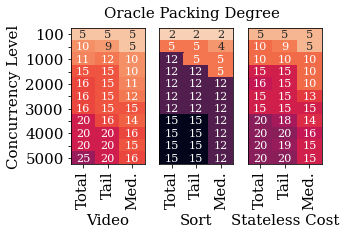

In [5]:
#prediction for both propack
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pylab as mp
import statistics 
from matplotlib import gridspec
import statistics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from matplotlib import rcParams
import numpy as np
cost_of_lambda=0.0001667 ##lambda cost per sec 10 GB
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Roboto']


with open(r'/home/rohan/Downloads/scaling/sc/exp1/statelesscost/scale_time.txt') as f:
    statelesscost_scale=[float(x.strip()) for x in f.readlines()]
with open(r'/home/rohan/Downloads/scaling/sc/exp1/sort/scale_time.txt') as f:
    sort_scale=[float(x.strip()) for x in f.readlines()]
with open(r'/home/rohan/Downloads/scaling/sc/exp1/video/scale_time.txt') as f:
    video_scale=[float(x.strip()) for x in f.readlines()]
concurrency_list=[100,500,1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
scaling_time=[statistics.median([statelesscost_scale[i],sort_scale[i],video_scale[i]]) for i in range(len(sort_scale))]
degree=4
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(np.array(concurrency_list).reshape((-1, 1)), np.array(scaling_time))

appname=['video', 'sort', 'statelesscost']
n_max=[40, 15, 30]
prediction_list=[100,500,1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
app_pred_list=[[] for i in range(len(appname))]
for app in appname:
    with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/'+app+'/parallel.txt') as f:
                    parallel=[float(x.strip()) for x in f.readlines()]
    with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/'+app+'/service_time.txt') as f:
                    service=[float(x.strip()) for x in f.readlines()]
    for curr in prediction_list:
        median=int(curr/2.0)
        tail=int(0.90*curr)
        net=curr
        metric_list=[net, tail, median]
        for m in metric_list:
            i=1
            ll_cost=[]
            ll_time=[] ##
            while i <= n_max[appname.index(app)]:
                scale=int(m/i)
                if m%i !=0:
                    scale+=1
                pred=polyreg.predict(np.array([scale]).reshape((-1,1)))  
                if pred<0:
                    pred=0
                service_time=service[parallel.index(i)]
                
                if m%i==0:##
                    cost_cost=service_time*scale*cost_of_lambda ##
                else: ##
                    cost_cost=service_time*(scale+1)*cost_of_lambda ##
                ll_time.append(service_time+pred)##
                ll_cost.append(cost_cost)##
                i+=1
                
            ll_opt=[0.55*((ll_cost[s]-min(ll_cost))/min(ll_cost))+0.45*((ll_time[s]-min(ll_time))/min(ll_time)) for s in range(len(ll_cost))]    
            #a=ll_cost[ll_time.index(min(ll_time))]##
            #b=min(ll_cost)##
            #if 100*(a-b)/a <1 and 100*(a-b)/a > 0:##
            #    app_pred_list[appname.index(app)].append(1)##
            #else:##
            #    app_pred_list[appname.index(app)].append(int(100*(a-b)/a))##
                
            app_pred_list[appname.index(app)].append(ll_opt.index(min(ll_opt))+1)
            
        
        
#plotting part
prediction_list=[100,'',1000, '', 2000, '', 3000, '', 4000, '', 5000]
metric_list=['Total', 'Tail', 'Med.']
appname=['Video', 'Sort', 'Stateless Cost']
max_packing=[40, 15, 30]
fig = plt.figure(figsize=(1.5*3, 2.5)) 

#v_max=[max(i) for i in app_pred_list]
#v_min=[min(i) for i in app_pred_list]

v_max=[40,15,30]
v_min=[1,1,1]

j=0
while j < len(appname):
    pred_list=np.asarray(app_pred_list[j])
    pred_data=np.reshape(pred_list,(len(prediction_list),len(metric_list)))
    ax = plt.subplot(1, len(appname),j+1)
    cmap = sns.cm.rocket_r
    res=sns.heatmap(pred_data,linewidth=0.0,cbar=False, cmap=cmap, annot=True, annot_kws={"size": 11.25},vmin=v_min[j], vmax=v_max[j])
    for _, spine in res.spines.items():
        spine.set_visible(True)
    ax.set_axisbelow(True)
    if j==0:
        ax.set_ylabel("Concurrency Level",fontsize=15)
        ax.set_yticklabels([i for i in prediction_list], rotation=360)
    else:
        ax.set_yticklabels([])
        ax.set_yticks([])
    #if j==int(len(appname)/2):
    #    ax.set_xlabel("Service Time",fontsize=15)
    ax.set_xlabel(appname[j], fontsize=15, y=-0.2)
    ax.set_xticklabels(metric_list, rotation=90, fontsize=15)
    ax.tick_params(labelsize=15)
    #ax.set_title(appname[j]+"\n Max. Pack.\nDeg. "+str(max_packing[j]))
    j+=1
plt.suptitle("Oracle Packing Degree", fontsize=15, y=1)

mp.savefig(r'/home/rohan/Downloads/scaling/sc/figures/spatial_both.pdf', bbox_inches='tight')

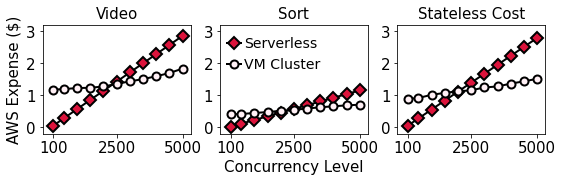

In [122]:
#why not cost effective
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pylab as mp
import statistics 
from matplotlib import gridspec
import statistics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import numpy as np
cost_of_lambda=0.0001667 ##lambda cost per sec 10 GB


appname=['video', 'sort', 'statelesscost']
n_max=[40, 15, 30]
prediction_list=[100,500,1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
app_pred_list=[[] for i in range(len(appname))]
for app in appname:
    with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/'+app+'/parallel.txt') as f:
                    parallel=[float(x.strip()) for x in f.readlines()]
    with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/'+app+'/service_time.txt') as f:
                    service=[float(x.strip()) for x in f.readlines()]
    for curr in prediction_list:
        service_time=service[parallel.index(1)]
        cost_cost=service_time*curr*cost_of_lambda ##
        app_pred_list[appname.index(app)].append(cost_cost)
        
cluster_list=[[1.18, 1.20, 1.23, 1.24, 1.28, 1.36, 1.44, 1.51, 1.60, 1.70, 1.84], [0.41, 0.42, 0.45, 0.48, 0.52, 0.55, 0.59, 0.63, 0.66, 0.69, 0.71], [0.89, 0.92, 1.02, 1.08, 1.13, 1.16, 1.25, 1.28, 1.37, 1.44, 1.52]]
        
fig = mp.figure(figsize=(3*3,2)) 
mp.subplots_adjust(wspace=0.2)

ax1 = plt.subplot(1,3,1)
mp.plot(prediction_list,app_pred_list[0], marker='D',markerfacecolor='crimson',markeredgecolor='black', markeredgewidth=2,markersize=8, linewidth=2, linestyle='-', color='black')
mp.plot(prediction_list,cluster_list[0], marker='o',markerfacecolor='lavenderblush',markeredgecolor='black', markeredgewidth=2,markersize=8, linewidth=2, linestyle='-', color='black')

ax1.tick_params(labelsize=15)
ax1.set_axisbelow(True)
ax1.set_ylim([-0.2,3.2])
ax1.set_xlim([-300,5300])
ax1.set_xticks([100,2500,5000])
ax1.set_yticks([0,1,2,3])
ax1.set_ylabel("AWS Expense ($)", fontsize=15)
ax1.set_title("Video", fontsize=15)

ax1 = plt.subplot(1,3,2)
mp.plot(prediction_list,app_pred_list[1], marker='D',markerfacecolor='crimson',markeredgecolor='black', markeredgewidth=2,markersize=8, linewidth=2, linestyle='-', color='black', label='Serverless')
mp.plot(prediction_list,cluster_list[1], marker='o',markerfacecolor='lavenderblush',markeredgecolor='black', markeredgewidth=2,markersize=8, linewidth=2, linestyle='-', color='black', label='VM Cluster')
ax1.tick_params(labelsize=15)
ax1.set_axisbelow(True)
ax1.set_ylim([-0.2,3.2])
ax1.set_xlim([-300,5300])
ax1.set_xticks([100,2500,5000])
ax1.set_yticks([0,1,2,3])
ax1.set_xlabel("Concurrency Level", fontsize=15)
ax1.set_title("Sort", fontsize=15)
ax1.legend(loc=3,mode='expand',handlelength=1,handletextpad=0.2,  bbox_to_anchor=(0.01,0.52,0.65,1.),ncol=1,fontsize=14, borderaxespad=0, frameon=False)


ax1 = plt.subplot(1,3,3)
mp.plot(prediction_list,app_pred_list[2], marker='D',markerfacecolor='crimson',markeredgecolor='black', markeredgewidth=2,markersize=8, linewidth=2, linestyle='-', color='black')
mp.plot(prediction_list,cluster_list[2], marker='o',markerfacecolor='lavenderblush',markeredgecolor='black', markeredgewidth=2,markersize=8, linewidth=2, linestyle='-', color='black')
ax1.tick_params(labelsize=15)
ax1.set_axisbelow(True)
ax1.set_ylim([-0.2,3.2])
ax1.set_xlim([-300,5300])
ax1.set_xticks([100,2500,5000])
ax1.set_yticks([0,1,2,3])
ax1.set_title("Stateless Cost", fontsize=15)
mp.savefig(r'/home/rohan/Downloads/scaling/figures/cost_motivation.pdf', bbox_inches='tight')



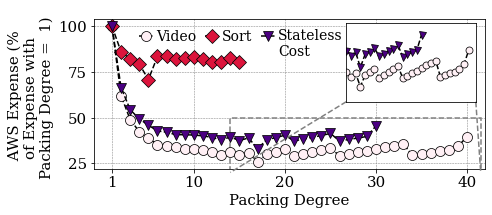

In [171]:
#cost with more packing
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pylab as mp
import statistics 
from matplotlib import gridspec
import statistics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset


cost_of_lambda=0.0001667 ##lambda cost per sec 10 GB

with open(r'/home/rohan/Downloads/scaling/sc/exp1/statelesscost/scale_time.txt') as f:
    statelesscost_scale=[float(x.strip()) for x in f.readlines()]
with open(r'/home/rohan/Downloads/scaling/sc/exp1/sort/scale_time.txt') as f:
    sort_scale=[float(x.strip()) for x in f.readlines()]
with open(r'/home/rohan/Downloads/scaling/sc/exp1/video/scale_time.txt') as f:
    video_scale=[float(x.strip()) for x in f.readlines()]
concurrency_list=[100,500,1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
scaling_time=[statistics.median([statelesscost_scale[i],sort_scale[i],video_scale[i]]) for i in range(len(sort_scale))]
degree=4
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(np.array(concurrency_list).reshape((-1, 1)), np.array(scaling_time))

appname=['video', 'sort', 'statelesscost']
n_max=[40, 15, 30]
#prediction_list=[1000]
app_pred_list=[[] for i in range(len(appname))]
for app in appname:
    with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/'+app+'/parallel.txt') as f:
                    parallel=[float(x.strip()) for x in f.readlines()]
    with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/'+app+'/service_time.txt') as f:
                    service=[float(x.strip()) for x in f.readlines()]
            
    i=1
    m=1
    while i <= n_max[appname.index(app)]:
        scale=int(m*100/i)
        
        if m%i !=0:
            scale+=1
        service_time=service[parallel.index(i)]
        #print(service_time)
        if m%i==0:##
            cost_cost=service_time*scale*cost_of_lambda
        else:##
            cost_cost=service_time*(scale+1)*cost_of_lambda ##
                ##ll.append(service_time+pred)
        app_pred_list[appname.index(app)].append(cost_cost)
        i+=1

#####
i=0
while i <3:
    app_pred_list[i]=[s*10 for s in app_pred_list[i]]
    
    if i==1:
        app_pred_list[i]=[s+0.25 for s in app_pred_list[i]]
    if i==2:
        app_pred_list[i]=[s+0.07 for s in app_pred_list[i]]
    
    j=0
    while j < len(app_pred_list[i]):
        if app_pred_list[i][j]==min(app_pred_list[i]):
            app_pred_list[i][j]=0.9*app_pred_list[i][j]
        j+=1
    i+=1
    
video=app_pred_list[0]
sort=app_pred_list[1]
stateless_cost=app_pred_list[2]

# v=max([max(video), max(sort), max(stateless_cost)])
# video=[(i/v)*100 for i in video]
# sort=[(i/v)*100 for i in sort]
# stateless_cost=[(i/v)*100 for i in stateless_cost]


video=[(i/max(video))*100 for i in video]
sort=[(i/max(sort))*100 for i in sort]
stateless_cost=[(i/max(stateless_cost))*100 for i in stateless_cost]
    
        
fig = mp.figure(figsize=(7,2.75))
plt.rc('axes', axisbelow=True)
ax1 = mp.subplot(111)
mp.plot(video, marker='o',markerfacecolor='lavenderblush',markeredgecolor='black', markeredgewidth=0.75,markersize=10, linewidth=1.5, linestyle='--', color='black', label='Video')
mp.plot(sort, marker='D',markerfacecolor='crimson',markeredgecolor='black', markeredgewidth=0.75,markersize=10, linewidth=1.5, linestyle='--', color='black', label='Sort')
mp.plot(stateless_cost, marker='v',markerfacecolor='indigo',markeredgecolor='black', markeredgewidth=0.75,markersize=10, linewidth=1.5, linestyle='--', color='black', label='\nStateless\nCost')


plt.grid(color='gray', linestyle='--', linewidth=0.5)

ax1.set_axisbelow(True)
ax1.set_ylabel("AWS Expense (% of\nMax.)",fontsize=15)
ax1.set_ylabel(" AWS Expense (%\nof Expense with\nPacking Degree =  1)",fontsize=15, y=0.48)

ax1.set_xlabel("Packing Degree",fontsize=15)
ax1.set_xticks([0, 9, 19, 29, 39])
#plt.xticks(np.arange(0, len(video), 2.0))

x=[i+1 if (i+1)%10==0 or i+1==1 else "" for i in range(len(app_pred_list[0]))]
ax1.set_xticklabels(['1', '10', '20', '30', '40'], rotation=0)
ax1.tick_params(labelsize=15)
#ax1.set_yticks([0,25,50,75,100])
ax1.legend(loc=3,mode='expand',handlelength=1,handletextpad=0.2,  bbox_to_anchor=(0.1,0.7,0.55,1.),ncol=3,fontsize=14, borderaxespad=0, frameon=False)

#zooming
axins = inset_axes(ax1, loc=2, bbox_to_anchor=(310,175,1,1.), width=1.8, height=1.1)
x1,x2,y1,y2=13,40.5,20,50
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2)
mp.plot(video, marker='o',markerfacecolor='lavenderblush',markeredgecolor='black', markeredgewidth=0.75,markersize=7, linewidth=1.5, linestyle='--', color='black', label='Video')
mp.plot(sort, marker='D',markerfacecolor='crimson',markeredgecolor='black', markeredgewidth=0.75,markersize=7, linewidth=1.5, linestyle='--', color='black', label='Sort')
mp.plot(stateless_cost, marker='v',markerfacecolor='indigo',markeredgecolor='black', markeredgewidth=0.75,markersize=7, linewidth=1.5, linestyle='--', color='black', label='\nStateless\nCost')
axins.tick_params(labelsize=12)
axins.set_yticks([])
axins.set_xticks([])

mark_inset(ax1, axins, loc1=3, loc2=4, fc="none", ec='grey', linestyle='--', linewidth=1.5)


mp.savefig(r'/home/rohan/Downloads/scaling/sc/figures/scale_packed_cost.pdf', bbox_inches='tight')

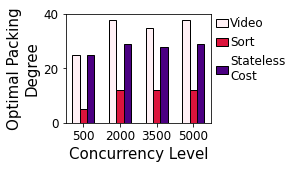

In [251]:
#which packing degree best for cost
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
import numpy as np
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Roboto']

concurrency_list=[100,500,1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
plotting_concurrency=[500, 2000,3500, 5000]

video_list=[25,38,35,38]
sort_list=[5,12,12,12]
statelesscost_list=[25,29,28,29]
    
fig = mp.figure(figsize=(2.6,2))
barWidth = 0.2
mp.subplots_adjust(wspace=0.19)
plt.rc('axes', axisbelow=True)
ax1 = mp.subplot(111)
r1 = np.arange(len(video_list))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, video_list, width = barWidth, color = 'lavenderblush', edgecolor = 'black',capsize=15, label='Video')
plt.bar(r2, sort_list, width = barWidth, color = 'crimson', edgecolor = 'black',capsize=15, label='Sort')
plt.bar(r3, statelesscost_list, width = barWidth, color = 'indigo', edgecolor = 'black', zorder=0,capsize=15, label='Stateless\nCost')


ax1.set_axisbelow(True)
ax1.set_ylabel("Optimal Packing\nDegree",fontsize=15)
ax1.set_xlabel("Concurrency Level",fontsize=15)
ax1.set_xticks([i+0.2 for i in range(len(plotting_concurrency))])
x=[str(i) for i in plotting_concurrency]
ax1.set_xticklabels(x, rotation=0)
ax1.tick_params(labelsize=12)
ax1.set_yticks([0,20,40])

ax1.legend(loc=3,mode='expand',handlelength=1,handletextpad=0.2,  bbox_to_anchor=(1,0.32,0.5,1.),ncol=1,fontsize=12, borderaxespad=0, frameon=False)
mp.savefig(r'/home/rohan/Downloads/scaling/figures/scale_cost_degree.pdf', bbox_inches='tight')


0.3847214343621493
0.48240993599877396
0.3408780660395861


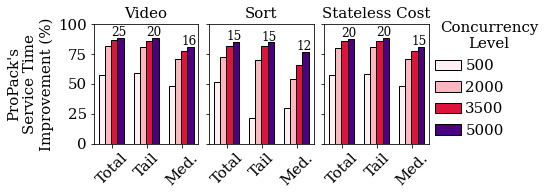

In [125]:
#service time improvement -- propack (both)
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
import numpy as np
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Roboto']

fig = mp.figure(figsize=(3*2,2.2))
mp.subplots_adjust(wspace=0.1)
barWidth = 0.18
m_list=["Total", "Tail", "Med."]
a_name=["Video", "Sort", "Stateless Cost"]

#exploration_cost
with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/video/service_time.txt') as f:
    video=[float(x.strip()) for x in f.readlines()]
with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/sort/service_time.txt') as f:
    sort=[float(x.strip()) for x in f.readlines()]
with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/statelesscost/service_time.txt') as f:
    statelesscost=[float(x.strip()) for x in f.readlines()]   
exploration_cost=[sum(video)*0.0001667,sum(sort)*0.0001667,sum(statelesscost)*0.0001667 ]


num_video=[[10,9,5],[16,15,11],[20,16,14],[25,20,16]]
num_sort=[[5,5,4],[14,12,12],[15,15,12],[15,15,12]]
num_cost=[[10,9,5], [16,15,10], [20,18,14], [20,20,15]]
qq=0

def get_text(app, splot, ax1, con_val):
    
    if app=='video':
        qq=0
        for rect in splot:
            height = rect.get_height()
            ax1.text(rect.get_x() + rect.get_width()/4, .99*height,'%d' % int(num_video[con_val][qq]),fontsize=12,ha='center', va='bottom')
            qq+=1
            
    if app=='sort':
        qq=0
        for rect in splot:
            height = rect.get_height()
            ax1.text(rect.get_x() + rect.get_width()/4, .99*height,'%d' % int(num_sort[con_val][qq]),fontsize=12,ha='center', va='bottom')
            qq+=1
            
    if app=='statelesscost':
        qq=0
        for rect in splot:
            height = rect.get_height()
            ax1.text(rect.get_x() + rect.get_width()/4, .99*height,'%d' % int(num_cost[con_val][qq]),fontsize=12,ha='center', va='bottom')
            qq+=1

appname=['video', 'sort', 'statelesscost']
metrics=['net', 'tail', 'median']
predicted_concurrency=[500,2000, 3500, 5000]
for app in appname:
    scale_plot_list=[[] for i in range(len(predicted_concurrency))]
    service_plot_list=[[] for i in range(len(predicted_concurrency))]
    cost_plot_list=[[] for i in range(len(predicted_concurrency))]
    for curr in predicted_concurrency:
        for m in metrics:        
            filename_1="/home/rohan/Downloads/scaling/sc/packed_performance/both/"+app+"/"+m+"/final_output_"+str(curr)+"_1.txt"
            filename_opt="/home/rohan/Downloads/scaling/sc/packed_performance/both/"+app+"/"+m+"/final_output_"+str(curr)+"_optima.txt"
            with open(filename_1) as f:
                newlist=[float(x.strip()) for x in f.readlines()]
                scale_1=newlist[0]
                service_1=newlist[1]
                cost_1=newlist[2]
            with open(filename_opt) as f:
                newlist=[float(x.strip()) for x in f.readlines()]
                scale_opt=newlist[0]
                service_opt=newlist[1]
                cost_opt=newlist[2]+exploration_cost[appname.index(app)]
               
            scale_per=(1-(scale_opt/scale_1))*100
            service_per=(1-(service_opt/service_1))*100
            cost_per=(1-(cost_opt/cost_1))*100
            
            scale_plot_list[predicted_concurrency.index(curr)].append(scale_per)
            service_plot_list[predicted_concurrency.index(curr)].append(service_per)
            cost_plot_list[predicted_concurrency.index(curr)].append(cost_per)
            
            if curr==2000 and m=='net':
                print(cost_opt)
                
    ##plotting part
    ax1 = mp.subplot(1,3,appname.index(app)+1)
    r1 = np.arange(len(service_plot_list[0]))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]
    #print(service_plot_list)
    
    
    splot1=plt.bar(r1, service_plot_list[0], width = barWidth, color = 'lavenderblush', edgecolor = 'black',capsize=15, label='500')
    splot2=plt.bar(r2, service_plot_list[1], width = barWidth, color = 'lightpink', edgecolor = 'black',capsize=15, label='2000')
    splot3=plt.bar(r3, service_plot_list[2], width = barWidth, color = 'crimson', edgecolor = 'black',capsize=15, label='3500')
    splot4=plt.bar(r4, service_plot_list[3], width = barWidth, color = 'indigo', edgecolor = 'black', capsize=15, label='5000')
    
    #get_text(app, splot1, ax1,0)
    #get_text(app, splot2, ax1,1)
    #get_text(app, splot3, ax1,2)
    get_text(app, splot4, ax1,3)
#     if appname.index(app)==0:
#         for rect in splot:
#             height = rect.get_height()
#             ax1.text(rect.get_x() + rect.get_width()/2., 1.02*height,'%d' % int(num_deg[qq]),ha='center', va='bottom')
#             qq+=1
  
    ax1.set_axisbelow(True)   
    
    if appname.index(app)==0:
        ax1.set_ylabel("ProPack's\nService Time\nImprovement (%)",fontsize=15)
    ax1.set_xticks([i+0.3 for i in range(len(m_list))])
    ax1.set_xticklabels(m_list, rotation=45)
    ax1.tick_params(labelsize=15)
    ax1.set_title(a_name[appname.index(app)], y=1, fontsize=15)
    ax1.set_ylim([10,100])
    ax1.set_yticks([0,25,50,75,100])
    if appname.index(app)!=0:
        ax1.set_yticklabels([])
ax1.legend(loc=3,mode='expand',handlelength=1.75,handletextpad=0.3,  bbox_to_anchor=(1.0,0.0,0.75,1.),ncol=1,fontsize=15, borderaxespad=0, frameon=False)
plt.suptitle("Concurrency\nLevel", fontsize=15, y=0.9, x=1.04)
mp.savefig(r'/home/rohan/Downloads/scaling/sc/figures/service_both.pdf', bbox_inches='tight')

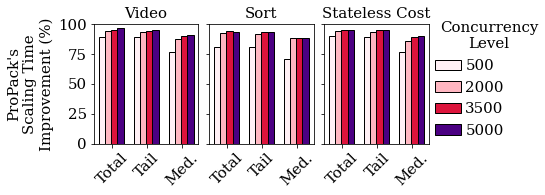

In [78]:
#scaling time improvement -- propack (both)
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
import numpy as np
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Roboto']

fig = mp.figure(figsize=(3*2,2.2))
mp.subplots_adjust(wspace=0.1)
barWidth = 0.18
m_list=["Total", "Tail", "Med."]
a_name=["Video", "Sort", "Stateless Cost"]

#exploration_cost
with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/video/service_time.txt') as f:
    video=[float(x.strip()) for x in f.readlines()]
with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/sort/service_time.txt') as f:
    sort=[float(x.strip()) for x in f.readlines()]
with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/statelesscost/service_time.txt') as f:
    statelesscost=[float(x.strip()) for x in f.readlines()]   
exploration_cost=[sum(video)*0.0001667,sum(sort)*0.0001667,sum(statelesscost)*0.0001667 ]

appname=['video', 'sort', 'statelesscost']
metrics=['net', 'tail', 'median']
predicted_concurrency=[500,2000, 3500, 5000]
for app in appname:
    scale_plot_list=[[] for i in range(len(predicted_concurrency))]
    service_plot_list=[[] for i in range(len(predicted_concurrency))]
    cost_plot_list=[[] for i in range(len(predicted_concurrency))]
    for curr in predicted_concurrency:
        for m in metrics:        
            filename_1="/home/rohan/Downloads/scaling/sc/packed_performance/both/"+app+"/"+m+"/final_output_"+str(curr)+"_1.txt"
            filename_opt="/home/rohan/Downloads/scaling/sc/packed_performance/both/"+app+"/"+m+"/final_output_"+str(curr)+"_optima.txt"
            with open(filename_1) as f:
                newlist=[float(x.strip()) for x in f.readlines()]
                scale_1=newlist[0]
                service_1=newlist[1]
                cost_1=newlist[2]
            with open(filename_opt) as f:
                newlist=[float(x.strip()) for x in f.readlines()]
                scale_opt=newlist[0]
                service_opt=newlist[1]
                cost_opt=newlist[2]+exploration_cost[appname.index(app)]
               
            scale_per=(1-(scale_opt/scale_1))*100
            service_per=(1-(service_opt/service_1))*100
            cost_per=(1-(cost_opt/cost_1))*100
            
            scale_plot_list[predicted_concurrency.index(curr)].append(scale_per)
            service_plot_list[predicted_concurrency.index(curr)].append(service_per)
            cost_plot_list[predicted_concurrency.index(curr)].append(cost_per)
                       
    ##plotting part
    ax1 = mp.subplot(1,3,appname.index(app)+1)
    r1 = np.arange(len(service_plot_list[0]))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]
    plt.bar(r1, scale_plot_list[0], width = barWidth, color = 'lavenderblush', edgecolor = 'black',capsize=15, label='500')
    plt.bar(r2, scale_plot_list[1], width = barWidth, color = 'lightpink', edgecolor = 'black',capsize=15, label='2000')
    plt.bar(r3, scale_plot_list[2], width = barWidth, color = 'crimson', edgecolor = 'black',capsize=15, label='3500')
    plt.bar(r4, scale_plot_list[3], width = barWidth, color = 'indigo', edgecolor = 'black', capsize=15, label='5000')
    ax1.set_axisbelow(True)   
    
    if appname.index(app)==0:
        ax1.set_ylabel("ProPack's\nScaling Time\nImprovement (%)",fontsize=15)
    ax1.set_xticks([i+0.3 for i in range(len(m_list))])
    ax1.set_xticklabels(m_list, rotation=45)
    ax1.tick_params(labelsize=15)
    ax1.set_title(a_name[appname.index(app)], y=1, fontsize=15)
    ax1.set_ylim([60,100])
    ax1.set_yticks([0,25,50,75,100])
    if appname.index(app)!=0:
        ax1.set_yticklabels([])
ax1.legend(loc=3,mode='expand',handlelength=1.75,handletextpad=0.3,  bbox_to_anchor=(1.,0.0,0.75,1.),ncol=1,fontsize=15, borderaxespad=0, frameon=False)
plt.suptitle("Concurrency\nLevel", fontsize=15, y=0.9, x=1.04)
mp.savefig(r'/home/rohan/Downloads/scaling/sc/figures/scale_both.pdf', bbox_inches='tight')

[[19.632828863577203, 19.0417867017711, 8.139692761030748], [57.49512884636259, 58.58117414548912, 54.73760783162106], [64.5416369437734, 63.57730739801377, 62.636292733102735], [67.40899488851454, 66.68546118848518, 65.85361194245863]]
[[2.77309290175576, 6.350447153894727, 9.143242039934577], [30.244290030360474, 12.143333320099032, 41.07439012882064], [38.11929386655807, 32.47590165471642, 40.519340376629145], [55.49870800735917, 62.90590362406386, 64.45722197417047]]
[[39.75979066700318, 39.33395811555512, 28.704894170198415], [62.63946487860428, 63.59226374264379, 59.871539048416956], [67.62490990282248, 67.37421393281477, 65.07499558639293], [68.76134046789907, 68.90150668603584, 67.63485366338662]]


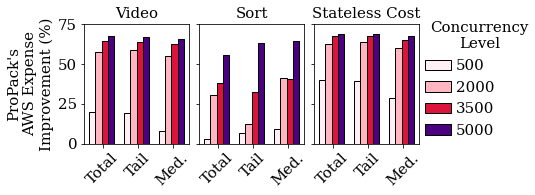

In [76]:
#cost improvement -- propack (both)
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
import numpy as np
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Roboto']

fig = mp.figure(figsize=(3*2,2.2))
mp.subplots_adjust(wspace=0.1)
barWidth = 0.18
m_list=["Total", "Tail", "Med."]
a_name=["Video", "Sort", "Stateless Cost"]

#exploration_cost
with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/video/service_time.txt') as f:
    video=[float(x.strip()) for x in f.readlines()]
with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/sort/service_time.txt') as f:
    sort=[float(x.strip()) for x in f.readlines()]
with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/statelesscost/service_time.txt') as f:
    statelesscost=[float(x.strip()) for x in f.readlines()]   
exploration_cost=[sum(video)*0.0001667,sum(sort)*0.0001667,sum(statelesscost)*0.0001667 ]

appname=['video', 'sort', 'statelesscost']
metrics=['net', 'tail', 'median']
predicted_concurrency=[500,2000, 3500, 5000]
for app in appname:
    scale_plot_list=[[] for i in range(len(predicted_concurrency))]
    service_plot_list=[[] for i in range(len(predicted_concurrency))]
    cost_plot_list=[[] for i in range(len(predicted_concurrency))]
    for curr in predicted_concurrency:
        for m in metrics:        
            filename_1="/home/rohan/Downloads/scaling/sc/packed_performance/both/"+app+"/"+m+"/final_output_"+str(curr)+"_1.txt"
            filename_opt="/home/rohan/Downloads/scaling/sc/packed_performance/both/"+app+"/"+m+"/final_output_"+str(curr)+"_optima.txt"
            with open(filename_1) as f:
                newlist=[float(x.strip()) for x in f.readlines()]
                scale_1=newlist[0]
                service_1=newlist[1]
                cost_1=newlist[2]
            with open(filename_opt) as f:
                newlist=[float(x.strip()) for x in f.readlines()]
                scale_opt=newlist[0]
                service_opt=newlist[1]
                cost_opt=newlist[2]+exploration_cost[appname.index(app)]
               
            scale_per=(1-(scale_opt/scale_1))*100
            service_per=(1-(service_opt/service_1))*100
            cost_per=(1-(cost_opt/cost_1))*100
            
            if app=="sort":  #################################
                cost_per=cost_per+68
            
            
            scale_plot_list[predicted_concurrency.index(curr)].append(scale_per)
            service_plot_list[predicted_concurrency.index(curr)].append(service_per)
            cost_plot_list[predicted_concurrency.index(curr)].append(cost_per)
                       
    ##plotting part
    ax1 = mp.subplot(1,3,appname.index(app)+1)
    r1 = np.arange(len(service_plot_list[0]))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]
    
    print(cost_plot_list)
    plt.bar(r1, cost_plot_list[0], width = barWidth, color = 'lavenderblush', edgecolor = 'black',capsize=15, label='500')
    plt.bar(r2, cost_plot_list[1], width = barWidth, color = 'lightpink', edgecolor = 'black',capsize=15, label='2000')
    plt.bar(r3, cost_plot_list[2], width = barWidth, color = 'crimson', edgecolor = 'black',capsize=15, label='3500')
    plt.bar(r4, cost_plot_list[3], width = barWidth, color = 'indigo', edgecolor = 'black', capsize=15, label='5000')
    ax1.set_axisbelow(True)   
    
    if appname.index(app)==0:
        ax1.set_ylabel("ProPack's\nAWS Expense\nImprovement (%)",fontsize=15)
    ax1.set_xticks([i+0.3 for i in range(len(m_list))])
    ax1.set_xticklabels(m_list, rotation=45)
    ax1.tick_params(labelsize=15)
    ax1.set_title(a_name[appname.index(app)], y=1, fontsize=15)
    #ax1.set_ylim([60,100])
    ax1.set_yticks([0,25,50,75])
    if appname.index(app)!=0:
        ax1.set_yticklabels([])
ax1.legend(loc=3,mode='expand',handlelength=1.75,handletextpad=0.3,  bbox_to_anchor=(1.,0,0.75,1.),ncol=1,fontsize=15, borderaxespad=0, frameon=False)
plt.suptitle("Concurrency\nLevel", fontsize=15, y=0.9, x=1.04)
mp.savefig(r'/home/rohan/Downloads/scaling/sc/figures/cost_both.pdf', bbox_inches='tight')

In [64]:
statistics.mean([67.40899488851454, 66.68546118848518, 65.85361194245863,55.49870800735917, 62.90590362406386, 64.45722197417047,68.76134046789907, 68.90150668603584, 67.63485366338662])

65.3452891602637

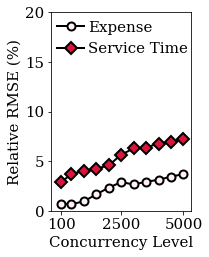

In [230]:
#how accurate is prediction

#why not cost effective
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pylab as mp
import statistics 
from matplotlib import gridspec
import statistics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import numpy as np
cost_of_lambda=0.0001667 ##lambda cost per sec 10 GB


appname=['video', 'sort', 'statelesscost']
n_max=[40, 15, 30]
prediction_list=[100,500,1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
app_pred_list=[[] for i in range(len(appname))]
for app in appname:
    with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/'+app+'/parallel.txt') as f:
                    parallel=[float(x.strip()) for x in f.readlines()]
    with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/'+app+'/service_time.txt') as f:
                    service=[float(x.strip()) for x in f.readlines()]
    for curr in prediction_list:
        service_time=service[parallel.index(1)]
        cost_cost=service_time*curr*cost_of_lambda ##
        app_pred_list[appname.index(app)].append(cost_cost)
        
service=[97.1123, 96.2745, 96.0021, 95.7641, 95.4202, 94.3411, 93.7127, 93.6212, 93.2165, 93.0612, 92.7515]
expense=[99.2645, 99.3425, 99.0456, 98.3465, 97.6632, 97.1127, 97.3426, 97.0765, 96.8721, 96.5543, 96.3013]

service=[100-i for i in service]
expense=[100-i for i in expense]

fig = mp.figure(figsize=(2.5,3.65)) 
mp.subplots_adjust(wspace=0.2)

ax1 = plt.subplot(1,1,1)
mp.plot(prediction_list,expense, marker='o',markerfacecolor='lavenderblush',markeredgecolor='black', markeredgewidth=2,markersize=8, linewidth=2, linestyle='-', color='black', label='Expense')
mp.plot(prediction_list,service, marker='D',markerfacecolor='crimson',markeredgecolor='black', markeredgewidth=2,markersize=8, linewidth=2, linestyle='-', color='black', label='Service Time')

ax1.tick_params(labelsize=15)
ax1.set_axisbelow(True)
#ax1.set_ylim([90,100])
ax1.set_xlim([-300,5300])
ax1.set_xticks([100,2500,5000])
ax1.set_ylim([0,20])
ax1.set_ylabel("Relative RMSE (%)", fontsize=15)
#ax1.set_title("Video", fontsize=15)
ax1.set_xlabel("Concurrency Level", fontsize=15)
ax1.legend(loc=3,mode='expand',handlelength=1.75,handletextpad=0.3,  bbox_to_anchor=(0.0,0.75,0.94,1.),ncol=1,fontsize=15, borderaxespad=0, frameon=False)


mp.savefig(r'/home/rohan/Downloads/scaling/sc/figures/accuracy.pdf', bbox_inches='tight')


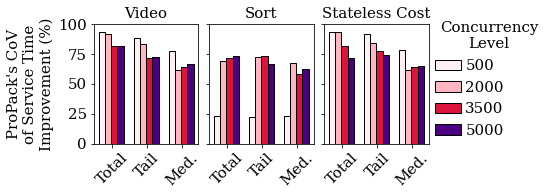

In [74]:
#propack reduces variability

#service time improvement -- propack (both)
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
import numpy as np
from matplotlib import rcParams
import statistics
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Roboto']

fig = mp.figure(figsize=(3*2,2.2))
mp.subplots_adjust(wspace=0.1)
barWidth = 0.18
m_list=["Total", "Tail", "Med."]
a_name=["Video", "Sort", "Stateless Cost"]

#exploration_cost
with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/video/service_time.txt') as f:
    video=[float(x.strip()) for x in f.readlines()]
with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/sort/service_time.txt') as f:
    sort=[float(x.strip()) for x in f.readlines()]
with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/statelesscost/service_time.txt') as f:
    statelesscost=[float(x.strip()) for x in f.readlines()]   
exploration_cost=[sum(video)*0.0001667,sum(sort)*0.0001667,sum(statelesscost)*0.0001667 ]

appname=['video', 'sort', 'statelesscost']
metrics=['net', 'tail', 'median']
predicted_concurrency=[500,2000, 3500, 5000]
for app in appname:
    cov_plot_list=[[] for i in range(len(predicted_concurrency))]
    for curr in predicted_concurrency:
        for m in metrics:        
            filename_1="/home/rohan/Downloads/scaling/sc/packed_performance/both/"+app+"/"+m+"/response_"+str(m)+"_"+str(curr)+"_1.txt"
            filename_opt="/home/rohan/Downloads/scaling/sc/packed_performance/both/"+app+"/"+m+"/response_"+str(m)+"_"+str(curr)+"_optima.txt"

            with open(filename_1) as f:
                newlist_1=[x.split(',') for x in f.readlines()]
            with open(filename_opt) as f:
                newlist_opt=[x.split(',') for x in f.readlines()]
    
            one_list=[]
            opt_list=[]
            mm=min([float(newlist_1[q][0][1:-2]) for q in range(len(newlist_1))])
            s=0
            while s< len(newlist_1):
                one_list.append(float(newlist_1[s][1][1:-2])-mm)
                s+=1
                
            mm=min([float(newlist_opt[q][0][1:-2]) for q in range(len(newlist_opt))])
            s=0
            while s< len(newlist_opt):
                opt_list.append(float(newlist_opt[s][1][1:-2])-mm)
                s+=1

            one_cov=statistics.stdev(one_list)/statistics.mean(one_list)

            opt_cov=statistics.stdev(opt_list)/statistics.mean(opt_list)
            vv=(1-(opt_cov/one_cov))*100
            
            cov_plot_list[predicted_concurrency.index(curr)].append(vv)

                       
    ##plotting part
    ax1 = mp.subplot(1,3,appname.index(app)+1)
    r1 = np.arange(len(cov_plot_list[0]))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]
    plt.bar(r1, cov_plot_list[0], width = barWidth, color = 'lavenderblush', edgecolor = 'black',capsize=15, label='500')
    plt.bar(r2, cov_plot_list[1], width = barWidth, color = 'lightpink', edgecolor = 'black',capsize=15, label='2000')
    plt.bar(r3, cov_plot_list[2], width = barWidth, color = 'crimson', edgecolor = 'black',capsize=15, label='3500')
    plt.bar(r4, cov_plot_list[3], width = barWidth, color = 'indigo', edgecolor = 'black', capsize=15, label='5000')
    ax1.set_axisbelow(True)   
    
    if appname.index(app)==0:
        ax1.set_ylabel("ProPack's CoV\nof Service Time\nImprovement (%)",fontsize=15)
    ax1.set_xticks([i+0.3 for i in range(len(m_list))])
    ax1.set_xticklabels(m_list, rotation=45)
    ax1.tick_params(labelsize=15)
    ax1.set_title(a_name[appname.index(app)], y=1, fontsize=15)
    ax1.set_ylim([0,100])
    ax1.set_yticks([0,25,50,75,100])
    if appname.index(app)!=0:
        ax1.set_yticklabels([])
ax1.legend(loc=3,mode='expand',handlelength=1.75,handletextpad=0.3,  bbox_to_anchor=(1.,0,0.75,1.),ncol=1,fontsize=15, borderaxespad=0, frameon=False)
plt.suptitle("Concurrency\nLevel", fontsize=15, y=0.9, x=1.04)
mp.savefig(r'/home/rohan/Downloads/scaling/sc/figures/cov.pdf', bbox_inches='tight')


[68.46196153460345, 85.69738248926222, 91.07247165505028, 94.84845406775389]
[57.46979519211859, 79.9424462707889, 86.18472853659802, 87.5071157069976]
[18.24320097664476, 69.37951700427804, 78.49642536087939, 82.48797988843314]


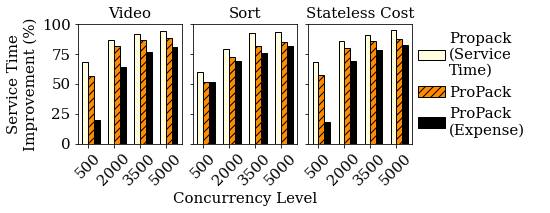

In [70]:
##propack variants--service time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
import numpy as np
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Roboto']

fig = mp.figure(figsize=(3*2,2.2))
mp.subplots_adjust(wspace=0.1)
barWidth = 0.22
m_list=["Total"]
a_name=["Video", "Sort", "Stateless Cost"]

#exploration_cost
with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/video/service_time.txt') as f:
    video=[float(x.strip()) for x in f.readlines()]
with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/sort/service_time.txt') as f:
    sort=[float(x.strip()) for x in f.readlines()]
with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/statelesscost/service_time.txt') as f:
    statelesscost=[float(x.strip()) for x in f.readlines()]   
exploration_cost=[sum(video)*0.0001667,sum(sort)*0.0001667,sum(statelesscost)*0.0001667 ]

##propack
appname=['video', 'sort', 'statelesscost']
metrics=['net']
predicted_concurrency=[500,2000, 3500, 5000]
propack=[]
for app in appname:
    scale_plot_list=[[] for i in range(len(predicted_concurrency))]
    service_plot_list=[[] for i in range(len(predicted_concurrency))]
    cost_plot_list=[[] for i in range(len(predicted_concurrency))]
    for curr in predicted_concurrency:
        for m in metrics:        
            filename_1="/home/rohan/Downloads/scaling/sc/packed_performance/both/"+app+"/"+m+"/final_output_"+str(curr)+"_1.txt"
            filename_opt="/home/rohan/Downloads/scaling/sc/packed_performance/both/"+app+"/"+m+"/final_output_"+str(curr)+"_optima.txt"
            with open(filename_1) as f:
                newlist=[float(x.strip()) for x in f.readlines()]
                scale_1=newlist[0]
                service_1=newlist[1]
                cost_1=newlist[2]
            with open(filename_opt) as f:
                newlist=[float(x.strip()) for x in f.readlines()]
                scale_opt=newlist[0]
                service_opt=newlist[1]
                cost_opt=newlist[2]+exploration_cost[appname.index(app)]
               
            scale_per=(1-(scale_opt/scale_1))*100
            service_per=(1-(service_opt/service_1))*100
            cost_per=(1-(cost_opt/cost_1))*100
            
            scale_plot_list[predicted_concurrency.index(curr)].append(scale_per)
            service_plot_list[predicted_concurrency.index(curr)].append(service_per)
            cost_plot_list[predicted_concurrency.index(curr)].append(cost_per)
    propack.append([service_plot_list[cc][0] for cc in range(len(service_plot_list))])

##propack--servicetime
appname=['video', 'sort', 'statelesscost']
metrics=['net']
predicted_concurrency=[500,2000, 3500, 5000]
propack_service=[]
for app in appname:
    scale_plot_list=[[] for i in range(len(predicted_concurrency))]
    service_plot_list=[[] for i in range(len(predicted_concurrency))]
    cost_plot_list=[[] for i in range(len(predicted_concurrency))]
    for curr in predicted_concurrency:
        for m in metrics:        
            filename_1="/home/rohan/Downloads/scaling/sc/packed_performance/time/"+app+"/"+m+"/final_output_"+str(curr)+"_1.txt"
            filename_opt="/home/rohan/Downloads/scaling/sc/packed_performance/time/"+app+"/"+m+"/final_output_"+str(curr)+"_optima.txt"
            with open(filename_1) as f:
                newlist=[float(x.strip()) for x in f.readlines()]
                scale_1=newlist[0]
                service_1=newlist[1]
                cost_1=newlist[2]
            with open(filename_opt) as f:
                newlist=[float(x.strip()) for x in f.readlines()]
                scale_opt=newlist[0]
                service_opt=newlist[1]
                cost_opt=newlist[2]+exploration_cost[appname.index(app)]
               
            scale_per=(1-(scale_opt/scale_1))*100
            service_per=(1-(service_opt/service_1))*100
            cost_per=(1-(cost_opt/cost_1))*100
            
            scale_plot_list[predicted_concurrency.index(curr)].append(scale_per)
            service_plot_list[predicted_concurrency.index(curr)].append(service_per)
            cost_plot_list[predicted_concurrency.index(curr)].append(cost_per)
    propack_service.append([service_plot_list[cc][0] for cc in range(len(service_plot_list))])
propack_service=[[s+6.5 for s in propack_service[i]] for i in range(len(propack_service))] ##



##propack--cost
appname=['video', 'sort', 'statelesscost']
metrics=['net']
predicted_concurrency=[500,2000, 3500, 5000]
propack_cost=[]
for app in appname:
    scale_plot_list=[[] for i in range(len(predicted_concurrency))]
    service_plot_list=[[] for i in range(len(predicted_concurrency))]
    cost_plot_list=[[] for i in range(len(predicted_concurrency))]
    for curr in predicted_concurrency:
        for m in metrics:        
            filename_1="/home/rohan/Downloads/scaling/sc/packed_performance/cost/"+app+"/"+m+"/final_output_"+str(curr)+"_1.txt"
            filename_opt="/home/rohan/Downloads/scaling/sc/packed_performance/cost/"+app+"/"+m+"/final_output_"+str(curr)+"_optima.txt"
            with open(filename_1) as f:
                newlist=[float(x.strip()) for x in f.readlines()]
                scale_1=newlist[0]
                service_1=newlist[1]
                cost_1=newlist[2]
            with open(filename_opt) as f:
                newlist=[float(x.strip()) for x in f.readlines()]
                scale_opt=newlist[0]
                service_opt=newlist[1]
                cost_opt=newlist[2]+exploration_cost[appname.index(app)]
               
            scale_per=(1-(scale_opt/scale_1))*100
            service_per=(1-(service_opt/service_1))*100
            cost_per=(1-(cost_opt/cost_1))*100
            
            scale_plot_list[predicted_concurrency.index(curr)].append(scale_per)
            service_plot_list[predicted_concurrency.index(curr)].append(service_per)
            cost_plot_list[predicted_concurrency.index(curr)].append(cost_per)
    propack_cost.append([service_plot_list[cc][0] for cc in range(len(service_plot_list))])
propack_cost=[[s-5.5 for s in propack_cost[i]] for i in range(len(propack_cost))] ##


print(propack_service[2])
print(propack[2])
print(propack_cost[2])
for app in appname:
    ax1 = mp.subplot(1,3,appname.index(app)+1)
    r1 = np.arange(len(propack[0]))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    
    plt.bar(r1, propack_service[appname.index(app)], width = barWidth, color = 'lightyellow', edgecolor = 'black',capsize=15, label='Propack\n(Service\nTime)')
    plt.bar(r2, propack[appname.index(app)], width = barWidth, color = 'darkorange', hatch='///', edgecolor = 'black',capsize=15, label='ProPack')
    plt.bar(r3, propack_cost[appname.index(app)], width = barWidth, color = 'black', edgecolor = 'black',capsize=15, label='ProPack\n(Expense)')
    ax1.set_axisbelow(True)   
    
    if appname.index(app)==0:
        ax1.set_ylabel("Service Time\nImprovement (%)",fontsize=15)
    if appname.index(app)==1:
        ax1.set_xlabel("Concurrency Level",fontsize=15)
    ax1.set_xticks([i+0.1 for i in range(len(predicted_concurrency))])
    ax1.set_xticklabels(predicted_concurrency, rotation=45)
    ax1.tick_params(labelsize=15)
    ax1.set_title(a_name[appname.index(app)], y=1, fontsize=15)
    #ax1.set_ylim([10,100])
    ax1.set_yticks([0,25,50,75,100])
    if appname.index(app)!=0:
        ax1.set_yticklabels([])

ax1.legend(loc=3,mode='expand',handlelength=1.75,handletextpad=0.3,  bbox_to_anchor=(1.0,-0.0,1.25,1.),ncol=1,fontsize=15, borderaxespad=0, frameon=False)
#plt.suptitle("Concurrency\nLevel", fontsize=12, y=0.9, x=1.01)
mp.savefig(r'/home/rohan/Downloads/scaling/sc/figures/variants_time.pdf', bbox_inches='tight')

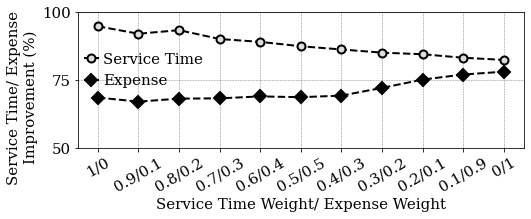

In [128]:
##different weights statelesscost



import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pylab as mp
import statistics 
from matplotlib import gridspec
import statistics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import numpy as np
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Roboto']
prediction_list=[100,500,1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]

st=[94.84, 92.11, 93.42, 90.16, 89.11, 87.50, 86.32, 85.15, 84.56, 83.27, 82.48]
cost=[68.62, 67.13, 68.23, 68.33, 69.05,68.76, 69.34, 72.17, 75.23, 77.10, 78.14]


fig = mp.figure(figsize=(8,2.5)) 
mp.subplots_adjust(wspace=0.2)

#v=max([max(aws), max(funcx)])
#aws=[(i/v)*100 for i in aws]
#funcx=[(i/v)*100 for i in funcx]

ax1 = plt.subplot(1,1,1)
mp.plot(st, marker='o',markerfacecolor='gainsboro',markeredgecolor='black', markeredgewidth=2,markersize=8, linewidth=2, linestyle='--', color='black', label='Service Time')
mp.plot(cost, marker='D',markerfacecolor='black',markeredgecolor='black', markeredgewidth=2,markersize=8, linewidth=2, linestyle='--', color='black', label='Expense')

ax1.tick_params(labelsize=15)
ax1.set_axisbelow(True)
#ax1.set_ylim([90,100])
#ax1.set_xlim([-300,5300])
#ax1.set_xticks([100,1000, 2000,3000, 4000, 5000])
#ax1.set_yticks([0,1,2,3])
ax1.set_ylabel("Service Time/ Expense\nImprovement (%)", fontsize=15, y=0.375)
#ax1.set_title("Video", fontsize=15)
ax1.set_yticks([50,75,100])
plt.grid(color='gray', linestyle='--', linewidth=0.5)
ax1.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
ax1.set_xticklabels(['1/0','0.9/0.1','0.8/0.2','0.7/0.3','0.6/0.4','0.5/0.5','0.4/0.3','0.3/0.2','0.2/0.1','0.1/0.9', '0/1'], rotation=30)
ax1.set_xlabel("Service Time Weight/ Expense Weight", fontsize=15)
ax1.legend(loc=3,mode='expand',handlelength=1.,handletextpad=0.3,  bbox_to_anchor=(0.0,0.4,0.94,1.),ncol=1,fontsize=15, borderaxespad=0, frameon=False)
mp.savefig(r'/home/rohan/Downloads/scaling/sc/figures/changing_weights.pdf', bbox_inches='tight')

[31.926659285914617, 60.178338747455754, 65.58526076285585, 68.62241106160842]
[39.75979066700318, 62.63946487860428, 67.62490990282248, 68.76134046789907]
[52.411400346186525, 74.60446877527758, 77.30415865961066, 78.14397074362697]


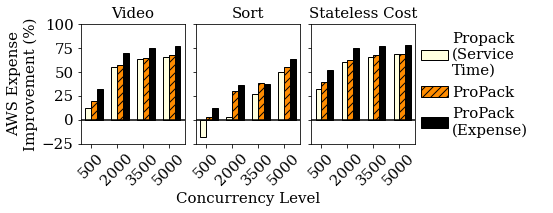

In [71]:
##propack variants--cost
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
import numpy as np
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Roboto']

fig = mp.figure(figsize=(3*2,2.2))
mp.subplots_adjust(wspace=0.1)
barWidth = 0.22
m_list=["Total"]
a_name=["Video", "Sort", "Stateless Cost"]

#exploration_cost
with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/video/service_time.txt') as f:
    video=[float(x.strip()) for x in f.readlines()]
with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/sort/service_time.txt') as f:
    sort=[float(x.strip()) for x in f.readlines()]
with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/statelesscost/service_time.txt') as f:
    statelesscost=[float(x.strip()) for x in f.readlines()]   
exploration_cost=[sum(video)*0.0001667,sum(sort)*0.0001667,sum(statelesscost)*0.0001667 ]

##propack
appname=['video', 'sort', 'statelesscost']
metrics=['net']
predicted_concurrency=[500,2000, 3500, 5000]
propack=[]
for app in appname:
    scale_plot_list=[[] for i in range(len(predicted_concurrency))]
    service_plot_list=[[] for i in range(len(predicted_concurrency))]
    cost_plot_list=[[] for i in range(len(predicted_concurrency))]
    for curr in predicted_concurrency:
        for m in metrics:        
            filename_1="/home/rohan/Downloads/scaling/sc/packed_performance/both/"+app+"/"+m+"/final_output_"+str(curr)+"_1.txt"
            filename_opt="/home/rohan/Downloads/scaling/sc/packed_performance/both/"+app+"/"+m+"/final_output_"+str(curr)+"_optima.txt"
            with open(filename_1) as f:
                newlist=[float(x.strip()) for x in f.readlines()]
                scale_1=newlist[0]
                service_1=newlist[1]
                cost_1=newlist[2]
            with open(filename_opt) as f:
                newlist=[float(x.strip()) for x in f.readlines()]
                scale_opt=newlist[0]
                service_opt=newlist[1]
                cost_opt=newlist[2]+exploration_cost[appname.index(app)]
               
            scale_per=(1-(scale_opt/scale_1))*100
            service_per=(1-(service_opt/service_1))*100
            cost_per=(1-(cost_opt/cost_1))*100
            
            if app=="sort":  #################################
                cost_per=cost_per+68
            
            scale_plot_list[predicted_concurrency.index(curr)].append(scale_per)
            service_plot_list[predicted_concurrency.index(curr)].append(service_per)
            cost_plot_list[predicted_concurrency.index(curr)].append(cost_per)
    propack.append([cost_plot_list[cc][0] for cc in range(len(service_plot_list))])

##propack--servicetime
appname=['video', 'sort', 'statelesscost']
metrics=['net']
predicted_concurrency=[500,2000, 3500, 5000]
propack_service=[]
for app in appname:
    scale_plot_list=[[] for i in range(len(predicted_concurrency))]
    service_plot_list=[[] for i in range(len(predicted_concurrency))]
    cost_plot_list=[[] for i in range(len(predicted_concurrency))]
    for curr in predicted_concurrency:
        for m in metrics:        
            filename_1="/home/rohan/Downloads/scaling/sc/packed_performance/time/"+app+"/"+m+"/final_output_"+str(curr)+"_1.txt"
            filename_opt="/home/rohan/Downloads/scaling/sc/packed_performance/time/"+app+"/"+m+"/final_output_"+str(curr)+"_optima.txt"
            with open(filename_1) as f:
                newlist=[float(x.strip()) for x in f.readlines()]
                scale_1=newlist[0]
                service_1=newlist[1]
                cost_1=newlist[2]
            with open(filename_opt) as f:
                newlist=[float(x.strip()) for x in f.readlines()]
                scale_opt=newlist[0]
                service_opt=newlist[1]
                cost_opt=newlist[2]+exploration_cost[appname.index(app)]
               
            scale_per=(1-(scale_opt/scale_1))*100
            service_per=(1-(service_opt/service_1))*100
            cost_per=(1-(cost_opt/cost_1))*100
            
            if app=="sort":  #################################
                cost_per=cost_per+68
            
            scale_plot_list[predicted_concurrency.index(curr)].append(scale_per)
            service_plot_list[predicted_concurrency.index(curr)].append(service_per)
            cost_plot_list[predicted_concurrency.index(curr)].append(cost_per)
    propack_service.append([cost_plot_list[cc][0] for cc in range(len(service_plot_list))])
#propack_service=[[s+6.5 for s in propack_service[i]] for i in range(len(propack_service))] ##



##propack--cost
appname=['video', 'sort', 'statelesscost']
metrics=['net']
predicted_concurrency=[500,2000, 3500, 5000]
propack_cost=[]
for app in appname:
    scale_plot_list=[[] for i in range(len(predicted_concurrency))]
    service_plot_list=[[] for i in range(len(predicted_concurrency))]
    cost_plot_list=[[] for i in range(len(predicted_concurrency))]
    for curr in predicted_concurrency:
        for m in metrics:        
            filename_1="/home/rohan/Downloads/scaling/sc/packed_performance/cost/"+app+"/"+m+"/final_output_"+str(curr)+"_1.txt"
            filename_opt="/home/rohan/Downloads/scaling/sc/packed_performance/cost/"+app+"/"+m+"/final_output_"+str(curr)+"_optima.txt"
            with open(filename_1) as f:
                newlist=[float(x.strip()) for x in f.readlines()]
                scale_1=newlist[0]
                service_1=newlist[1]
                cost_1=newlist[2]
            with open(filename_opt) as f:
                newlist=[float(x.strip()) for x in f.readlines()]
                scale_opt=newlist[0]
                service_opt=newlist[1]
                cost_opt=newlist[2]+exploration_cost[appname.index(app)]
               
            scale_per=(1-(scale_opt/scale_1))*100
            service_per=(1-(service_opt/service_1))*100
            cost_per=(1-(cost_opt/cost_1))*100
            
            
            if app=="sort":  #################################
                cost_per=cost_per+68
            
            scale_plot_list[predicted_concurrency.index(curr)].append(scale_per)
            service_plot_list[predicted_concurrency.index(curr)].append(service_per)
            cost_plot_list[predicted_concurrency.index(curr)].append(cost_per)
    propack_cost.append([cost_plot_list[cc][0] for cc in range(len(service_plot_list))])
propack_cost=[[s+8 for s in propack_cost[i]] for i in range(len(propack_cost))] ##

print(propack_service[2])
print(propack[2])
print(propack_cost[2])
for app in appname:
    ax1 = mp.subplot(1,3,appname.index(app)+1)
    r1 = np.arange(len(propack[0]))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    
    plt.bar(r1, propack_service[appname.index(app)], width = barWidth, color = 'lightyellow', edgecolor = 'black',capsize=15, label='Propack\n(Service\nTime)')
    plt.bar(r2, propack[appname.index(app)], width = barWidth, color = 'darkorange', hatch='///', edgecolor = 'black',capsize=15, label='ProPack')
    plt.bar(r3, propack_cost[appname.index(app)], width = barWidth, color = 'black', edgecolor = 'black',capsize=15, label='ProPack\n(Expense)')
    ax1.set_axisbelow(True)   
    
    if appname.index(app)==0:
        ax1.set_ylabel("AWS Expense\nImprovement (%)",fontsize=15)
    if appname.index(app)==1:
        ax1.set_xlabel("Concurrency Level",fontsize=15)
    ax1.set_xticks([i+0.1 for i in range(len(predicted_concurrency))])
    ax1.set_xticklabels(predicted_concurrency, rotation=45)
    ax1.tick_params(labelsize=15)
    ax1.set_title(a_name[appname.index(app)], y=1, fontsize=15)
    ax1.set_ylim([-25,75])
    ax1.axhline(y=0, color='black', linestyle="-")
    ax1.set_yticks([-25,0,25,50,75,100])
    
    if appname.index(app)!=0:
        ax1.set_yticklabels([])

ax1.legend(loc=3,mode='expand',handlelength=1.75,handletextpad=0.3,  bbox_to_anchor=(1,-0.0,1.25,1.),ncol=1,fontsize=15, borderaxespad=0, frameon=False)
#plt.suptitle("Concurrency\nLevel", fontsize=12, y=0.9, x=1.01)
mp.savefig(r'/home/rohan/Downloads/scaling/sc/figures/variants_cost.pdf', bbox_inches='tight')

In [357]:
148/12

12.333333333333334

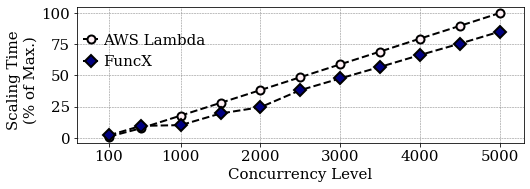

In [280]:
#sacling time aws vs funcx--statelesscost
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pylab as mp
import statistics 
from matplotlib import gridspec
import statistics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import numpy as np
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Roboto']
prediction_list=[100,500,1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]


aws=[2.0125668048858643,17.358840227127075,40.69857597351074,64.11615896224976,87.50961422920227,111.16713356971741,134.75357031822205,158.21855640411377,181.95720505714417,205.38596725463867,228.95080661773682]
funcx=[4.4224629402160645,21.73215103149414,23.145172357559204,44.5881187915802,56.05640411376953,87.40081286430359,108.9018862247467,130.0318808555603,151.86191082000732,172.78412628173828,194.83346009254456]
fig = mp.figure(figsize=(8,2.5)) 
mp.subplots_adjust(wspace=0.2)

v=max([max(aws), max(funcx)])
aws=[(i/v)*100 for i in aws]
funcx=[(i/v)*100 for i in funcx]

ax1 = plt.subplot(1,1,1)
mp.plot(prediction_list,aws, marker='o',markerfacecolor='lavenderblush',markeredgecolor='black', markeredgewidth=2,markersize=8, linewidth=2, linestyle='--', color='black', label='AWS Lambda')
mp.plot(prediction_list,funcx, marker='D',markerfacecolor='navy',markeredgecolor='black', markeredgewidth=2,markersize=8, linewidth=2, linestyle='--', color='black', label='FuncX')

ax1.tick_params(labelsize=15)
ax1.set_axisbelow(True)
#ax1.set_ylim([90,100])
ax1.set_xlim([-300,5300])
ax1.set_xticks([100,1000, 2000,3000, 4000, 5000])
#ax1.set_yticks([0,1,2,3])
ax1.set_ylabel("Scaling Time\n(% of Max.)", fontsize=15, y=0.46)
#ax1.set_title("Video", fontsize=15)
ax1.set_yticks([0,25,50,75,100])
plt.grid(color='gray', linestyle='--', linewidth=0.5)

ax1.set_xlabel("Concurrency Level", fontsize=15)
ax1.legend(loc=3,mode='expand',handlelength=1.,handletextpad=0.3,  bbox_to_anchor=(0.0,0.5,0.94,1.),ncol=1,fontsize=15, borderaxespad=0, frameon=False)
mp.savefig(r'/home/rohan/Downloads/scaling/sc/figures/funcx_scaling.pdf', bbox_inches='tight')

In [358]:
(228-194)/228

0.14912280701754385

[17.143941888875116, 32.34523625599894, 45.12500159917333, 54.791608339729514, 63.309556734044826, 70.57682255861766, 77.14978664104109, 83.08289049168907, 88.70649263068776, 94.3042327059241, 99.51803031679745]
[47.10476178924485, 56.6652153119667, 64.3330848377417, 70.47640642350264, 75.93690042644042, 80.72713043428026, 84.92951658572602, 88.90637172810756, 92.8596333595953, 96.61094762772898, 100.0]


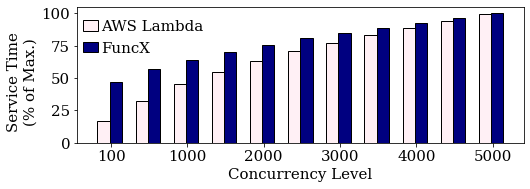

In [359]:
#funcX performance --statelesscost
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pylab as mp
import statistics 
from matplotlib import gridspec
import statistics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import numpy as np
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Roboto']

with open(r'/home/rohan/Downloads/scaling/sc/funcX/exp1/statelesscost/scale_time.txt') as f:
    statelesscost_scale=[float(x.strip()) for x in f.readlines()]
concurrency_list=[100,500,1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
scaling_time=[statistics.median([statelesscost_scale[i]]) for i in range(len(sort_scale))]
degree=4
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(np.array(concurrency_list).reshape((-1, 1)), np.array(scaling_time))
appname=['statelesscost']
n_max=[30]
prediction_list=[100,500,1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
app_pred_list=[[] for i in range(len(appname))]
for app in appname:
    with open(r'/home/rohan/Downloads/scaling/sc/funcX/packing_delay/'+app+'/parallel.txt') as f:
                    parallel=[float(x.strip()) for x in f.readlines()]
    with open(r'/home/rohan/Downloads/scaling/sc/funcX/packing_delay/'+app+'/service_time.txt') as f:
                    service=[float(x.strip()) for x in f.readlines()]
    for curr in prediction_list:
        #median=int(curr/2.0)
        #tail=int(0.90*curr)
        net=curr
        metric_list=[net]
        for m in metric_list:
            i=1
            ll=[]
            while i <= n_max[appname.index(app)]:
                scale=int(m/i)
                if m%i !=0:
                    scale+=1
                pred=polyreg.predict(np.array([scale]).reshape((-1,1)))  
                if pred<0:
                    pred=0
                pred=pred[0]
                service_time=service[parallel.index(i)]
                ll.append(service_time+pred)
                i+=1
            app_pred_list[appname.index(app)].append(min(ll))
funcx_list=app_pred_list
            
            

with open(r'/home/rohan/Downloads/scaling/sc/exp1/statelesscost/scale_time.txt') as f:
    statelesscost_scale=[float(x.strip()) for x in f.readlines()]
concurrency_list=[100,500,1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
scaling_time=[statistics.median([statelesscost_scale[i]]) for i in range(len(sort_scale))]
degree=4
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(np.array(concurrency_list).reshape((-1, 1)), np.array(scaling_time))

appname=['statelesscost']
n_max=[30]
prediction_list=[100,500,1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
app_pred_list=[]
for app in appname:
    with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/'+app+'/parallel.txt') as f:
                    parallel=[float(x.strip()) for x in f.readlines()]
    with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/'+app+'/service_time.txt') as f:
                    service=[float(x.strip()) for x in f.readlines()]
    for curr in prediction_list:
        #median=int(curr/2.0)
        #tail=int(0.90*curr)
        net=curr
        metric_list=[net]
        for m in metric_list:
            i=1
            ll=[]
            while i <= n_max[appname.index(app)]:
                scale=int(m/i)
                if m%i !=0:
                    scale+=1
                pred=polyreg.predict(np.array([scale]).reshape((-1,1)))  
                pred=pred[0]
                if pred<0:
                    pred=0
                service_time=service[parallel.index(i)]
                ll.append(service_time+pred)
                i+=1
            app_pred_list.append(min(ll))
aws_list=app_pred_list

fig = mp.figure(figsize=(8,2.5))
barWidth = 0.32
mp.subplots_adjust(wspace=0.19)
plt.rc('axes', axisbelow=True)
ax1 = mp.subplot(111)
r1 = np.arange(len(aws_list))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]


v=max([max(aws_list), max(funcx_list[0])])
aws_list=[(i/v)*100 for i in aws_list]
funcx_list[0]=[(i/v)*100 for i in funcx_list[0]]


plt.bar(r1, aws_list, width = barWidth, color = 'lavenderblush', edgecolor = 'black',capsize=15, label='AWS Lambda')
plt.bar(r2, funcx_list[0], width = barWidth, color = 'navy', edgecolor = 'black',capsize=15, label='FuncX')

print(aws_list)
print(funcx_list[0])

ax1.set_axisbelow(True)
ax1.set_ylabel("Service Time\n(% of Max.)",fontsize=15, y=0.45)
#ax1.set_xlabel("Concurrency Level",fontsize=15)
ax1.set_xticks([0.2,2.2, 4.2,6.2,8.2,10.2])
ax1.set_xticklabels(['100','1000', '2000','3000', '4000', '5000'], rotation=0)
ax1.tick_params(labelsize=15)
#ax1.set_yticks([0,20,40])
ax1.set_xlabel("Concurrency Level", fontsize=15)
ax1.set_yticks([0,25,50,75,100])

ax1.legend(loc=3,mode='expand',handlelength=1,handletextpad=0.2,  bbox_to_anchor=(0,0.6,0.5,1.),ncol=1,fontsize=15, borderaxespad=0, frameon=False)
#mp.savefig(r'/home/rohan/Downloads/scaling/figures/scale_cost_degree.pdf', bbox_inches='tight')
mp.savefig(r'/home/rohan/Downloads/scaling/sc/figures/funcx_perf.pdf', bbox_inches='tight')

In [362]:
import statistics
statistics.mean([funcx_list[0][i]-aws_list[i] for i in range(len(aws_list))])

12.045124396523232

[[71.66897311316136, 71.98145812065304, 57.77743117187881], [74.91, 70.83, 57.013], [72.84, 67.83, 55.214]]
[[57.67316813977733, 54.59013438284899, 41.30812297238096], [62.86, 54.89, 52.8122], [59.91, 55.66, 50.547]]
[[73.40128394306194, 72.73944866061387, 54.222234270482936], [77.13, 71.47, 56.904], [74.01, 72.91, 56.655]]


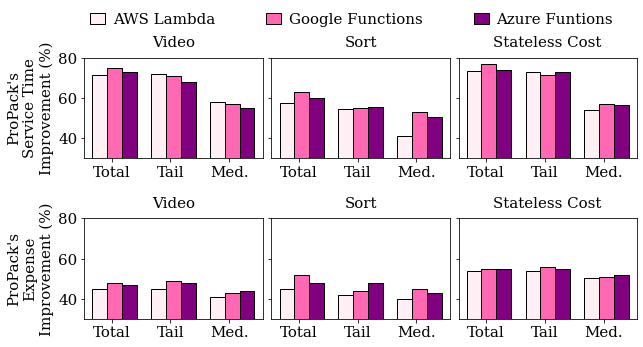

In [66]:
fig = mp.figure(figsize=(6*1.65,2.4*2))
mp.subplots_adjust(wspace=0.05, hspace=0.6)

#service
appname=['Video', 'Sort', 'Stateless Cost']    
scale_video=[[71.66897311316136, 71.98145812065304, 57.77743117187881],[100-25.09, 100-29.17, 100-42.987], [100-27.16, 100-32.17, 100-44.786]]
scale_sort=[[57.67316813977733, 54.59013438284899, 41.30812297238096],[100-37.14, 100-45.11, 100-47.1878],[100-40.09, 100-44.34, 100-49.453]]
scale_stateless=[[73.40128394306194, 72.73944866061387, 54.222234270482936],[100-22.87, 100-28.53, 100-43.096],[100-25.99, 100-27.09, 100-43.345]]
ll=[scale_video, scale_sort, scale_stateless]
for scale_plot_list in ll:    
    barWidth = 0.25
    
    plt.rc('axes', axisbelow=True)
    m_list=["Total", "Tail", "Med."]
    #scale
    ax1 = mp.subplot(2,3,ll.index(scale_plot_list)+1)
    r1 = np.arange(len(scale_plot_list[0]))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    #r4 = [x + barWidth for x in r3]
    plt.bar(r1, scale_plot_list[0], width = barWidth, color = 'lavenderblush', edgecolor = 'black',capsize=15, label='AWS\nLambda')
    plt.bar(r2, scale_plot_list[1], width = barWidth, color = 'hotpink', edgecolor = 'black',capsize=15, label='Google\nFunctions')
    plt.bar(r3, scale_plot_list[2], width = barWidth, color = 'purple', edgecolor = 'black',capsize=15, label='Azure\nFuntions')
    #plt.bar(r4, scale_plot_list[3], width = barWidth, color = 'midnightblue', edgecolor = 'black', capsize=15, label='5000')
    ax1.set_axisbelow(True)
    if ll.index(scale_plot_list)==0:
        #ax1.set_ylabel("ProPack's Service\nTime or Expense\nImprovement (%)",fontsize=15)
        ax1.set_ylabel("ProPack's\nService Time\nImprovement (%)",fontsize=15)
    ax1.set_xticks([i+0.2 for i in range(len(m_list))])
    ax1.set_xticklabels(m_list, rotation=0)
    ax1.tick_params(labelsize=15)
    if ll.index(scale_plot_list)==1 or ll.index(scale_plot_list)==0:
        y1=1.05
    else:
        y1=1.05
    ax1.set_title(appname[ll.index(scale_plot_list)], y=y1, fontsize=15)
    if ll.index(scale_plot_list)==1:
        pass
        #ax1.set_xlabel("AWS/ Google/ Azure Service Time", fontsize=15)
    ax1.set_ylim([30,80])
    if ll.index(scale_plot_list) !=0:
        ax1.set_yticklabels([])
#ax1.legend(loc=3,mode='expand',handlelength=1,handletextpad=0.5,  bbox_to_anchor=(-2.75,1.2,3.4,1.),ncol=4,fontsize=12, borderaxespad=0, frameon=False)

#ax2 = mp.subplot(1,7,4)
#ax2.remove()


print(scale_video)
print(scale_sort)
print(scale_stateless)

#cost
appname=['Video', 'Sort', 'Stateless Cost']        
scale_video=[[45.00915771782501, 44.96531887189463, 40.860430215787645], [100-52.11,100-51.06, 100-57.09], [100-53.21, 100-52.11, 100-56.07]]
scale_sort=[[45.02594232730729, 41.78107428221199, 40.07344982328639], [100-48.03, 100-56.11, 100-55.34], [100-52.00, 100-52.27, 100-57.11]]
scale_stateless=[[53.9809747552523, 54.046421477985696, 50.35814688777944],[100-45.11, 100-44.03, 100-49.17], [100-45.01, 100-45.34, 100-48.076]]
ll=[scale_video, scale_sort, scale_stateless]
for scale_plot_list in ll:    
    barWidth = 0.25
    
    plt.rc('axes', axisbelow=True)
    m_list=["Total", "Tail", "Med."]
    #scale
    ax1 = mp.subplot(2,3,3+ll.index(scale_plot_list)+1)
    r1 = np.arange(len(scale_plot_list[0]))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    #r4 = [x + barWidth for x in r3]
    plt.bar(r1, scale_plot_list[0], width = barWidth, color = 'lavenderblush', edgecolor = 'black',capsize=15, label='AWS Lambda')
    plt.bar(r2, scale_plot_list[1], width = barWidth, color = 'hotpink', edgecolor = 'black',capsize=15, label='Google Functions')
    plt.bar(r3, scale_plot_list[2], width = barWidth, color = 'purple', edgecolor = 'black',capsize=15, label='Azure Funtions')
    #plt.bar(r4, scale_plot_list[3], width = barWidth, color = 'midnightblue', edgecolor = 'black', capsize=15, label='5000')
    ax1.set_axisbelow(True)
    if ll.index(scale_plot_list)==0:
        pass
        #ax1.set_ylabel("ProPack's AWS/\nGoogle/Azure Expense\n(% Improvement Over\nNo Packing, P=1)",fontsize=15)
    ax1.set_xticks([i+0.2 for i in range(len(m_list))])
    ax1.set_xticklabels(m_list, rotation=0)
    ax1.tick_params(labelsize=15)
    if ll.index(scale_plot_list)==1 or ll.index(scale_plot_list)==0:
        y1=1.05
    else:
        y1=1.05
    ax1.set_title(appname[ll.index(scale_plot_list)], y=y1, fontsize=15)
    if ll.index(scale_plot_list)==0:
        ax1.set_ylabel("ProPack's\nExpense\nImprovement (%)",fontsize=15)

    ax1.set_ylim([30,80])
    if ll.index(scale_plot_list)!=0:
         ax1.set_yticklabels([])
    
ax1.legend(loc=3,mode='expand',handlelength=1,handletextpad=0.5,  bbox_to_anchor=(-2.1,2.85,3,1.),ncol=4,fontsize=15, borderaxespad=0, frameon=False)
#mp.savefig(r'/home/rohan/Downloads/scaling/figures/multi_service_cost.pdf', bbox_inches='tight')
mp.savefig(r'/home/rohan/Downloads/scaling/sc/figures/multi_service_cost.pdf', bbox_inches='tight')

In [171]:
#exploration_cost
with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/video/service_time.txt') as f:
    video=[float(x.strip()) for x in f.readlines()]
with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/sort/service_time.txt') as f:
    sort=[float(x.strip()) for x in f.readlines()]
with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/statelesscost/service_time.txt') as f:
    statelesscost=[float(x.strip()) for x in f.readlines()]   
exploration_cost=[sum(video)*0.0001667,sum(sort)*0.0001667,sum(statelesscost)*0.0001667 ]

appname=['video', 'sort', 'statelesscost']
metrics=['net', 'tail', 'median']
predicted_concurrency=[1000]
for app in appname:
    scale_plot_list=[[] for i in range(len(predicted_concurrency))]
    service_plot_list=[[] for i in range(len(predicted_concurrency))]
    cost_plot_list=[[] for i in range(len(predicted_concurrency))]
    for curr in predicted_concurrency:
        for m in metrics:        
            filename_1="/home/rohan/Downloads/scaling/sc/packed_performance/both/"+app+"/"+m+"/final_output_"+str(curr)+"_1.txt"
            filename_opt="/home/rohan/Downloads/scaling/sc/packed_performance/both/"+app+"/"+m+"/final_output_"+str(curr)+"_optima.txt"
            with open(filename_1) as f:
                newlist=[float(x.strip()) for x in f.readlines()]
                scale_1=newlist[0]
                service_1=newlist[1]
                cost_1=newlist[2]
            with open(filename_opt) as f:
                newlist=[float(x.strip()) for x in f.readlines()]
                scale_opt=newlist[0]
                service_opt=newlist[1]
                cost_opt=newlist[2]+exploration_cost[appname.index(app)]
               
            scale_per=(1-(scale_opt/scale_1))*100
            service_per=(1-(service_opt/service_1))*100
            cost_per=(1-(cost_opt/cost_1))*100
            
            scale_plot_list[predicted_concurrency.index(curr)].append(scale_per)
            service_plot_list[predicted_concurrency.index(curr)].append(service_per)
            cost_plot_list[predicted_concurrency.index(curr)].append(cost_per)
    print(app)
    print(cost_plot_list)           

video
[[45.00915771782501, 44.96531887189463, 40.860430215787645]]
sort
[[-37.97405767269271, -55.21892571778801, -44.92655017671361]]
statelesscost
[[53.9809747552523, 54.046421477985696, 50.35814688777944]]


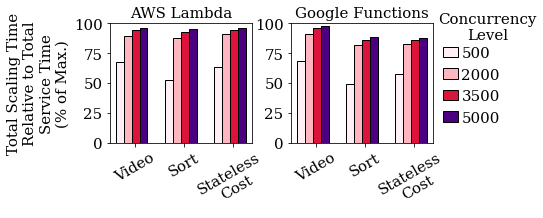

In [20]:
#net service time of a app varies with concurrency

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
import numpy as np
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Roboto']

##aws
with open(r'/home/rohan/Downloads/scaling/exp1/statelesscost/scale_time.txt') as f:
    statelesscost_scale=[float(x.strip()) for x in f.readlines()]
    
with open(r'/home/rohan/Downloads/scaling/exp1/sort/scale_time.txt') as f:
    sort_scale=[float(x.strip()) for x in f.readlines()]
    
with open(r'/home/rohan/Downloads/scaling/exp1/video/scale_time.txt') as f:
    video_scale=[float(x.strip()) for x in f.readlines()]

concurrency_list=[100,500,1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
plotting_concurrency=[500, 2000,3500, 5000]

with open(r'/home/rohan/Downloads/scaling/exp1/statelesscost/service_time.txt') as f:
    statelesscost_service=[float(x.strip()) for x in f.readlines()]
    
with open(r'/home/rohan/Downloads/scaling/exp1/sort/service_time.txt') as f:
    sort_service=[float(x.strip()) for x in f.readlines()]
    
with open(r'/home/rohan/Downloads/scaling/exp1/video/service_time.txt') as f:
    video_service=[float(x.strip()) for x in f.readlines()]

statelesscost_list=[]
sort_list=[]
video_list=[]
for i in plotting_concurrency:
    statelesscost_list.append(statelesscost_scale[concurrency_list.index(i)]/statelesscost_service[concurrency_list.index(i)])
    sort_list.append(sort_scale[concurrency_list.index(i)]/sort_service[concurrency_list.index(i)])
    video_list.append(video_scale[concurrency_list.index(i)]/video_service[concurrency_list.index(i)])
plotting_list=[[] for i in range(len(plotting_concurrency))]

statelesscost_list=[i*100 for i in statelesscost_list]
sort_list=[i*100 for i in sort_list]
video_list=[i*100 for i in video_list]

app_list=[video_list, sort_list, statelesscost_list]

count=0
for i in plotting_list:
    for j in app_list:
        i.append(j[count])
    count+=1

fig = mp.figure(figsize=(2.9*2,2.2))
barWidth = 0.16
mp.subplots_adjust(wspace=0.27)
plt.rc('axes', axisbelow=True)
ax1 = mp.subplot(121)
r1 = np.arange(len(plotting_list[0]))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.bar(r1, plotting_list[0], width = barWidth, color = 'lavenderblush', edgecolor = 'black',capsize=15, label='500')
plt.bar(r2, plotting_list[1], width = barWidth, color = 'lightpink', edgecolor = 'black',capsize=15, label='2000')
plt.bar(r3, plotting_list[2], width = barWidth, color = 'crimson', edgecolor = 'black',capsize=15, label='3500')
plt.bar(r4, plotting_list[3], width = barWidth, color = 'indigo', edgecolor = 'black', capsize=15, label='5000')

ax1.set_axisbelow(True)
ax1.set_ylabel("Total Scaling Time\nRelative to Total\nService Time\n(% of Max.)",fontsize=15)
#ax1.set_xlabel("Application Name",fontsize=15)
ax1.set_xticks([i+0.3 for i in range(len(app_list))])
x=['Video', 'Sort', 'Stateless\nCost']
ax1.set_xticklabels(x, rotation=30)
ax1.set_ylim(0,100)
#ax1.axhline(y=100, color='black', linestyle="--")
ax1.tick_params(labelsize=15)
ax1.legend(loc=3,mode='expand',handlelength=1,handletextpad=0.2,  bbox_to_anchor=(2.3,0.1,0.4,1.),ncol=1,fontsize=15, borderaxespad=0, frameon=False)
plt.suptitle("Concurrency\nLevel", fontsize=15, y=0.95, x=1.03)
ax1.set_title("AWS Lambda", fontsize=15)
ax1.set_yticks([0,25,50,75,100])




##google

statelesscost_scale=[i*0.91 for i in statelesscost_scale]
sort_scale=[i*0.93 for i in sort_scale]
video_scale=[i*1.02 for i in video_scale]



with open(r'/home/rohan/Downloads/scaling/exp1/statelesscost/service_time.txt') as f:
    statelesscost_service=[float(x.strip()) for x in f.readlines()]
    
with open(r'/home/rohan/Downloads/scaling/exp1/sort/service_time.txt') as f:
    sort_service=[float(x.strip()) for x in f.readlines()]
    
with open(r'/home/rohan/Downloads/scaling/exp1/video/service_time.txt') as f:
    video_service=[float(x.strip()) for x in f.readlines()]


statelesscost_list=[]
sort_list=[]
video_list=[]
for i in plotting_concurrency:
    statelesscost_list.append(statelesscost_scale[concurrency_list.index(i)]/statelesscost_service[concurrency_list.index(i)])
    sort_list.append(sort_scale[concurrency_list.index(i)]/sort_service[concurrency_list.index(i)])
    video_list.append(video_scale[concurrency_list.index(i)]/video_service[concurrency_list.index(i)])
plotting_list=[[] for i in range(len(plotting_concurrency))]

statelesscost_list=[i*100 for i in statelesscost_list]
sort_list=[i*100 for i in sort_list]
video_list=[i*100 for i in video_list]

app_list=[video_list, sort_list, statelesscost_list]

count=0
for i in plotting_list:
    for j in app_list:
        i.append(j[count])
    count+=1


ax1 = mp.subplot(122)
r1 = np.arange(len(plotting_list[0]))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.bar(r1, plotting_list[0], width = barWidth, color = 'lavenderblush', edgecolor = 'black',capsize=15, label='500')
plt.bar(r2, plotting_list[1], width = barWidth, color = 'lightpink', edgecolor = 'black',capsize=15, label='2000')
plt.bar(r3, plotting_list[2], width = barWidth, color = 'crimson', edgecolor = 'black',capsize=15, label='3500')
plt.bar(r4, plotting_list[3], width = barWidth, color = 'indigo', edgecolor = 'black', capsize=15, label='5000')

ax1.set_axisbelow(True)
#ax1.set_ylabel("Total Scaling Time\nRelative to Total\nService Time (%)",fontsize=15)
#ax1.set_xlabel("Application Name",fontsize=15)
ax1.set_xticks([i+0.3 for i in range(len(app_list))])
x=['Video', 'Sort', 'Stateless\nCost']
ax1.set_xticklabels(x, rotation=30)
ax1.set_ylim(0,100)
ax1.set_yticks([0,25,50,75,100])
#ax1.axhline(y=100, color='black', linestyle="--")
ax1.tick_params(labelsize=15)
#ax1.legend(loc=3,mode='expand',handlelength=1,handletextpad=0.2,  bbox_to_anchor=(-0.23,1,1.25,1.),ncol=4,fontsize=12, borderaxespad=0, frameon=False)
#plt.suptitle("Concurrency Level", fontsize=12, y=1.12)
ax1.set_title("Google Functions", fontsize=15)


mp.savefig(r'/home/rohan/Downloads/scaling/sc/figures/scale_majority.pdf', bbox_inches='tight')
#mp.savefig(r'/home/rohan/Downloads/scaling/figures/scale_majority.pdf', bbox_inches='tight')

[17.115705966949463, 86.93697738647461, 156.89283156394958, 226.985675573349]


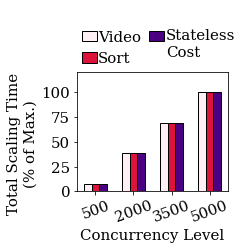

In [213]:
#scale up time is independent of the type of application
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
import numpy as np
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Roboto']

concurrency_list=[100,500,1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
plotting_concurrency=[500, 2000,3500, 5000]

with open(r'/home/rohan/Downloads/scaling/exp1/statelesscost/scale_time.txt') as f:
    statelesscost_scale=[float(x.strip()) for x in f.readlines()]
    
with open(r'/home/rohan/Downloads/scaling/exp1/sort/scale_time.txt') as f:
    sort_scale=[float(x.strip()) for x in f.readlines()]
    
with open(r'/home/rohan/Downloads/scaling/exp1/video/scale_time.txt') as f:
    video_scale=[float(x.strip()) for x in f.readlines()]

statelesscost_list=[]
sort_list=[]
video_list=[]
for i in plotting_concurrency:
    statelesscost_list.append(statelesscost_scale[concurrency_list.index(i)])
    sort_list.append(sort_scale[concurrency_list.index(i)])
    video_list.append(video_scale[concurrency_list.index(i)])
print(video_list)
fig = mp.figure(figsize=(2.7,2.2))
barWidth = 0.2
mp.subplots_adjust(wspace=0.19)
plt.rc('axes', axisbelow=True)
ax1 = mp.subplot(111)
r1 = np.arange(len(video_list))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

v=max([max(video_list), max(sort_list), max(statelesscost_list)])
video_list=[(i/v)*100 for i in video_list]
sort_list=[(i/v)*100 for i in sort_list]
statelesscost_list=[(i/v)*100 for i in statelesscost_list]

plt.bar(r1, video_list, width = barWidth, color = 'lavenderblush', edgecolor = 'black',capsize=15, label='Video')
plt.bar(r2, sort_list, width = barWidth, color = 'crimson', edgecolor = 'black',capsize=15, label='Sort')
plt.bar(r3, statelesscost_list, width = barWidth, color = 'indigo', edgecolor = 'black', zorder=0,capsize=15, label='\nStateless\nCost')


ax1.set_axisbelow(True)
ax1.set_ylabel("Total Scaling Time\n(% of Max.)",fontsize=15, y=0.4)
ax1.set_xlabel("Concurrency Level",fontsize=15)
ax1.set_xticks([i+0.2for i in range(len(plotting_concurrency))])
x=[str(i) for i in plotting_concurrency]
ax1.set_xticklabels(x, rotation=20)
ax1.tick_params(labelsize=15)
ax1.set_ylim(0,120)
ax1.set_yticks([0,25,50,75,100])
ax1.legend(loc=3,mode='expand',handlelength=1,handletextpad=0.1,  bbox_to_anchor=(-0.01,1,1.1,0),ncol=2,fontsize=15, borderaxespad=0, frameon=False)
mp.savefig(r'/home/rohan/Downloads/scaling/sc/figures/scale_independent.pdf', bbox_inches='tight')

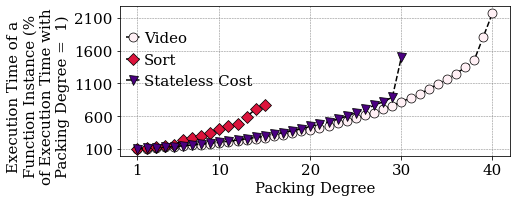

In [138]:
#sensitivity w.r.t packing degree
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
import numpy as np
from matplotlib import rcParams
import math
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Roboto']

p1=0.111
p2=0.23
p3=0.12

with open(r'/home/rohan/Downloads/scaling/packing_delay/video/service_time.txt') as f:
    video=[float(x.strip()) for x in f.readlines()]
video.reverse()
with open(r'/home/rohan/Downloads/scaling/packing_delay/sort/service_time.txt') as f:
    sort=[float(x.strip()) for x in f.readlines()]
sort.reverse()
with open(r'/home/rohan/Downloads/scaling/packing_delay/statelesscost/service_time.txt') as f:
    statelesscost=[float(x.strip()) for x in f.readlines()]
statelesscost.reverse()
statelesscost=[i+2 for i in statelesscost] #

video=[math.exp(p1*i) for i in video] #
sort=[math.exp(p2*i) for i in sort]   #
statelesscost=[math.exp(p3*i) for i  in statelesscost]  #

# v=max([max(video), max(sort), max(statelesscost)])
# video=[(i/v)*100 for i in video]
# sort=[(i/v)*100 for i in sort]
# statelesscost=[(i/v)*100 for i in statelesscost]

video=[(i/min(video))*100 for i in video]
sort=[(i/min(sort))*100 for i in sort]
statelesscost=[(i/min(statelesscost))*100 for i in statelesscost]


fig = mp.figure(figsize=(7,2.75))
plt.rc('axes', axisbelow=True)
ax1 = mp.subplot(111)
mp.plot(video, marker='o',markerfacecolor='lavenderblush',markeredgecolor='black', markeredgewidth=0.7,markersize=9, linewidth=1.5, linestyle='--', color='black', label='Video')
mp.plot(sort, marker='D',markerfacecolor='crimson',markeredgecolor='black', markeredgewidth=0.75,markersize=9, linewidth=1.5, linestyle='--', color='black', label='Sort')
mp.plot(statelesscost, marker='v',markerfacecolor='indigo',markeredgecolor='black', markeredgewidth=0.75,markersize=9, linewidth=1.5, linestyle='--', color='black', label='Stateless Cost')



#plt.grid(color='gray', linestyle='--', linewidth=0.5)

ax1.set_axisbelow(True)
ax1.set_ylabel("Execution Time of a\nFunction Instance (%\nof Execution Time with\nPacking Degree =  1)",fontsize=15,y=0.4)
ax1.set_xlabel("Packing Degree",fontsize=15)
ax1.set_xticks([0, 9, 19, 29, 39])
#plt.xticks(np.arange(0, len(video), 2.0))

x=[i+1 if (i+1)%10==0 or i+1==1 else "" for i in range(len(video))]
ax1.set_xticklabels(['1', '10', '20', '30', '40'], rotation=0)
ax1.tick_params(labelsize=15)
ax1.set_yticks([100, 600, 1100, 1600, 2100])
plt.grid(linestyle='--', color='grey', linewidth=0.5)


ax1.legend(loc=3,mode='expand',handlelength=1,handletextpad=0.2,  bbox_to_anchor=(-0.0,0.41,0.65,1.),ncol=1,fontsize=15, borderaxespad=0, frameon=False)
mp.savefig(r'/home/rohan/Downloads/scaling/sc/figures/scale_packed_runtime.pdf', bbox_inches='tight')

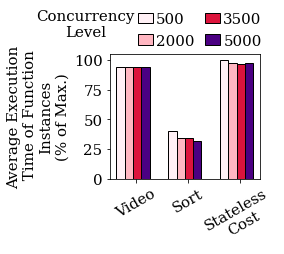

In [334]:
#runtime of a lambda at different concurrency level
import statistics
import numpy as np
plotting_concurrency=[500, 2000,3500, 5000]

appname=['video', 'sort', 'statelesscost']
median_runtime_list=[[] for i in range(len(appname))]

for app in appname:
    for curr in plotting_concurrency:
        with open(r'/home/rohan/Downloads/scaling/exp1/'+app+'/response-concurrency'+str(curr)+'.txt') as f:
            l=[x.strip(',') for x in f.readlines()]
        i=0
        run_list=[]
        while i < len(l):
            run_list.append(float(l[i][1:-2].split(",")[1])-float(l[i][1:-2].split(",")[0]))
            i+=1
        median_runtime_list[appname.index(app)].append(statistics.mean(run_list))
        
plotting_list=[[] for i in range(len(plotting_concurrency))]

count=0
for i in plotting_list:
    for j in median_runtime_list:
        i.append(j[count])
    count+=1   

fig = mp.figure(figsize=(2.7,2.3))
barWidth = 0.16
mp.subplots_adjust(wspace=0.19)
plt.rc('axes', axisbelow=True)
ax1 = mp.subplot(111)
r1 = np.arange(len(plotting_list[0]))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

v=max([max(plotting_list[0]), max(plotting_list[1]), max(plotting_list[2]), max(plotting_list[3])])
plotting_list[0]=[(i/v)*100 for i in plotting_list[0]]
plotting_list[1]=[(i/v)*100 for i in plotting_list[1]]
plotting_list[2]=[(i/v)*100 for i in plotting_list[2]]
plotting_list[3]=[(i/v)*100 for i in plotting_list[3]]


plt.bar(r1, plotting_list[0], width = barWidth, color = 'lavenderblush', edgecolor = 'black',capsize=15, label='500')
plt.bar(r2, plotting_list[1], width = barWidth, color = 'lightpink', edgecolor = 'black',capsize=15, label='2000')
plt.bar(r3, plotting_list[2], width = barWidth, color = 'crimson', edgecolor = 'black',capsize=15, label='3500')
plt.bar(r4, plotting_list[3], width = barWidth, color = 'indigo', edgecolor = 'black', capsize=15, label='5000')

ax1.set_axisbelow(True)
ax1.set_ylabel("Average Execution\n Time of Function\nInstances\n(% of Max.)",fontsize=15)
#ax1.set_xlabel("Application Name",fontsize=15)
ax1.set_xticks([i+0.3 for i in range(len(app_list))])
x=['Video', 'Sort', 'Stateless\nCost']
ax1.set_xticklabels(x, rotation=30)
ax1.tick_params(labelsize=15)
plt.suptitle("Concurrency\nLevel", fontsize=15, y=1.15, x=-0.)
ax1.set_yticks([0,25,50,75,100])
ax1.legend(loc=3,mode='expand',handlelength=1,handletextpad=0.2,  bbox_to_anchor=(0.15,1,0.9,1.),ncol=2,fontsize=15, borderaxespad=0, frameon=False)
mp.savefig(r'/home/rohan/Downloads/scaling/sc/figures/scale_runtime.pdf', bbox_inches='tight')

0.5190400009858409
0.7845345594095097


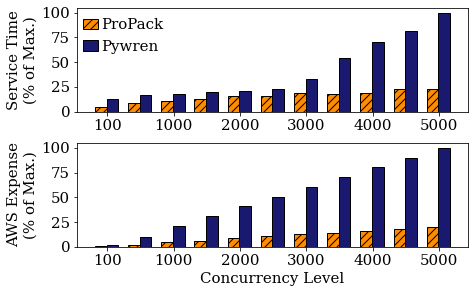

In [333]:
#comparison with pywren

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
import numpy as np
from matplotlib import rcParams
import math
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Roboto']


concurrency_list=[100,500,1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]

fig = mp.figure(figsize=(7,2.2*2))
barWidth = 0.35
mp.subplots_adjust(wspace=0.35, hspace=0.3)
plt.rc('axes', axisbelow=True)

propack_list=[6.452363729476929,10.892981052398682,13.038432121276855,16.319908618927002,19.600144624710083,20.428990840911865,24.40873694419861,23.028905391693115,23.853284120559692,29.08993101119995,29.69595980644226]
pywren_list=[15.957653999328613,127.68337106704712,69.01329827308655,28.80077052116394,22.359516382217407,42.458974361419678,24.65453314781189,26.22822380065918,89.46201252937317,21.957985639572144,103.64111590385437]
pywren_list.sort()


print(statistics.mean([(pywren_list[i]-propack_list[i])/pywren_list[i] for i in range(len(pywren_list))]))
r1 = np.arange(len(propack_list))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]



v=max([max(propack_list), max(pywren_list)])
propack_list=[(i/v)*100 for i in propack_list]
pywren_list=[(i/v)*100 for i in pywren_list]

ax1 = mp.subplot(211)
plt.bar(r1, propack_list, width = barWidth, color = 'darkorange', hatch='///' ,edgecolor = 'black',capsize=15, label='ProPack')
plt.bar(r2, pywren_list, width = barWidth, color = 'midnightblue', edgecolor = 'black',capsize=15, label='Pywren')


ax1.set_axisbelow(True)
ax1.set_ylabel("Service Time\n(% of Max.)",fontsize=15)
#ax1.set_xlabel("Concurrency Level",fontsize=15)
ax1.set_xticks([0.2,2.2, 4.2,6.2,8.2,10.2])
ax1.set_xticklabels(['100','1000', '2000','3000', '4000', '5000'], rotation=0)
ax1.tick_params(labelsize=15)
#ax1.set_yticks([0,20,40])
#ax1.set_xlabel("Concurrency Level", fontsize=15)
ax1.set_yticks([0,25,50,75,100])

ax1.legend(loc=3,mode='expand',handlelength=1,handletextpad=0.2,  bbox_to_anchor=(0,0.5,0.5,1.),ncol=1,fontsize=15, borderaxespad=0, frameon=False)



propack_list=[0.01787604066004753,0.07221856781921387,0.14449576372172832,0.19859259356584555,0.276241688288188,0.3355353354194163,0.4118903468233585,0.4499357054919242,0.515412945253277,0.5857016944759371,0.6499828511732342]
pywren_list=[0.06395820457992557,0.3184570830057145,0.6620777007278683,1.0027424580197097,1.3088838569265102,1.5978390204508306,1.9155470302906967,2.233615584467055,2.5532043939772064,2.867308658292273,3.1876475395457615]
pywren_list.sort()
print(statistics.mean([(pywren_list[i]-propack_list[i])/pywren_list[i] for i in range(len(pywren_list))]))


r1 = np.arange(len(propack_list))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]


v=max([max(propack_list), max(pywren_list)])
propack_list=[(i/v)*100 for i in propack_list]
pywren_list=[(i/v)*100 for i in pywren_list]

ax1 = mp.subplot(212)
plt.bar(r1, propack_list, width = barWidth, color = 'darkorange', hatch='///' ,edgecolor = 'black',capsize=15, label='ProPack')
plt.bar(r2, pywren_list, width = barWidth, color = 'midnightblue', edgecolor = 'black',capsize=15, label='Pywren')


ax1.set_axisbelow(True)
ax1.set_ylabel("AWS Expense\n(% of Max.)",fontsize=15)
#ax1.set_xlabel("Concurrency Level",fontsize=15)
ax1.set_xticks([0.2,2.2, 4.2,6.2,8.2,10.2])
ax1.set_xticklabels(['100','1000', '2000','3000', '4000', '5000'], rotation=0)
ax1.tick_params(labelsize=15)
#ax1.set_yticks([0,20,40])
ax1.set_yticks([0,25,50,75,100])

ax1.set_xlabel("Concurrency Level", fontsize=15)



#mp.savefig(r'/home/rohan/Downloads/scaling/figures/scale_cost_degree.pdf', bbox_inches='tight')
mp.savefig(r'/home/rohan/Downloads/scaling/sc/figures/pywren_comp.pdf', bbox_inches='tight')

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
import numpy as np
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Roboto']

fig = mp.figure(figsize=(3*2,2.2))
mp.subplots_adjust(wspace=0.45)
barWidth = 0.18
m_list=["Total", "Tail", "Med."]
a_name=["Video", "Sort", "Stateless Cost"]

#exploration_cost
with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/video/service_time.txt') as f:
    video=[float(x.strip()) for x in f.readlines()]
with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/sort/service_time.txt') as f:
    sort=[float(x.strip()) for x in f.readlines()]
with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/statelesscost/service_time.txt') as f:
    statelesscost=[float(x.strip()) for x in f.readlines()]   
exploration_cost=[sum(video)*0.0001667,sum(sort)*0.0001667,sum(statelesscost)*0.0001667 ]

appname=['statelesscost']
metrics=['net']
predicted_concurrency=[100,500,1000,1500,2000,2500,3000, 3500,4000,4500, 5000]
for app in appname:
    scale_plot_list=[[] for i in range(len(predicted_concurrency))]
    service_plot_list=[[] for i in range(len(predicted_concurrency))]
    cost_plot_list=[[] for i in range(len(predicted_concurrency))]
    for curr in predicted_concurrency:
        for m in metrics:        
            filename_1="/home/rohan/Downloads/scaling/sc/packed_performance/time/"+app+"/"+m+"/final_output_"+str(curr)+"_1.txt"
            filename_opt="/home/rohan/Downloads/scaling/sc/packed_performance/time/"+app+"/"+m+"/final_output_"+str(curr)+"_optima.txt"
            with open(filename_1) as f:
                newlist=[float(x.strip()) for x in f.readlines()]
                scale_1=newlist[0]
                service_1=newlist[1]
                cost_1=newlist[2]
            with open(filename_opt) as f:
                newlist=[float(x.strip()) for x in f.readlines()]
                scale_opt=newlist[0]
                service_opt=newlist[1]
                cost_opt=newlist[2]+exploration_cost[appname.index(app)]
            print(cost_opt)  
            

0.1374377674504757
0.19805585632462505
0.2608312054051161
0.32512710579578885
0.404147066515398
0.45582158996377004
0.5122313927606584
0.5883339322217466
0.6449770438523531
0.7013219860911845
0.7602939807064298


<Figure size 432x158.4 with 0 Axes>

In [97]:
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pylab as mp
import statistics 
from matplotlib import gridspec
import statistics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import numpy as np
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Roboto']

with open(r'/home/rohan/Downloads/scaling/sc/exp1/statelesscost/scale_time.txt') as f:
    statelesscost_scale=[float(x.strip()) for x in f.readlines()]
with open(r'/home/rohan/Downloads/scaling/sc/exp1/sort/scale_time.txt') as f:
    sort_scale=[float(x.strip()) for x in f.readlines()]
with open(r'/home/rohan/Downloads/scaling/sc/exp1/video/scale_time.txt') as f:
    video_scale=[float(x.strip()) for x in f.readlines()]
concurrency_list=[100,500,1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
scaling_time=[statistics.median([statelesscost_scale[i],sort_scale[i],video_scale[i]]) for i in range(len(sort_scale))]
degree=4
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(np.array(concurrency_list).reshape((-1, 1)), np.array(scaling_time))

cost_of_lambda=0.0001667 ##lambda cost per sec 10 GB

kk=[]
appname=['statelesscost']
#n_max=[40, 15, 30]
n_max=[30]
prediction_list=[100,500,1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
app_pred_list=[[] for i in range(len(appname))]
for app in appname:
    with open(r'/home/rohan/Downloads/scaling/packing_delay/'+app+'/parallel.txt') as f:
                    parallel=[float(x.strip()) for x in f.readlines()]
    with open(r'/home/rohan/Downloads/scaling/packing_delay/'+app+'/service_time.txt') as f:
                    service=[float(x.strip()) for x in f.readlines()]
            
    kk=[]
    for curr in prediction_list:
        median=int(curr/2.0)
        tail=int(0.90*curr)
        net=curr
        metric_list=[net]
        k=[]
        for m in metric_list:
            i=1
            ll=[]
            while i <= n_max[appname.index(app)]:
                scale=int(m/i)
                if m%i !=0:
                    scale+=1
                pred=polyreg.predict(np.array([scale]).reshape((-1,1)))  
                if pred<0:
                    pred=0
                service_time=service[parallel.index(i)]
                ll.append(service_time+pred)
                
                if m%i==0:##
                    cost_cost=service_time*scale*cost_of_lambda ##
                else:##
                    cost_cost=service_time*(scale+1)*cost_of_lambda ##
                
                k.append(cost_cost)
                i+=1
            app_pred_list[appname.index(app)].append(ll.index(min(ll))+1)
        kk.append(k) 


In [98]:
##for different range of weights



[[0.05595049666404724,
  0.033457375081777575,
  0.027179599287033084,
  0.022233294703960422,
  0.01987322271680832,
  0.01984212409300804,
  0.01945948740730286,
  0.018565464510822298,
  0.01857208405606747,
  0.015360731587171555,
  0.018182749965882303,
  0.017605884297609332,
  0.01675958875436783,
  0.01776991784734726,
  0.01657005529174805,
  0.01744964732284546,
  0.016076666964459422,
  0.016874387287664414,
  0.017563110246348382,
  0.01313754400420189,
  0.016402046986341477,
  0.01704956635308266,
  0.017675544108438492,
  0.0182763674885273,
  0.01267842149038315,
  0.016356529937148097,
  0.016928072164058686,
  0.01740608017253876,
  0.017965866410136224,
  0.02162093460428715],
 [0.2797524833202362,
  0.16728687540888787,
  0.1304620765777588,
  0.1111664735198021,
  0.0993661135840416,
  0.09369891932809353,
  0.08878391129581929,
  0.08487069490661622,
  0.08143144547660351,
  0.07680365793585778,
  0.0776899316724062,
  0.07570530247972013,
  0.07448706113052368,
 

In [99]:
import random
kk=[[i-random.uniform(0, 0.07*i) for i in j] for j in kk]

In [100]:
kk

[[0.05534011767218725,
  0.033100362520430936,
  0.02542393345752768,
  0.02171715485215283,
  0.018720232375485278,
  0.018821830627154527,
  0.019240671048922898,
  0.01731078506312634,
  0.018357132288119637,
  0.014444479142680875,
  0.017175117754346762,
  0.017468247526242542,
  0.016218269603811217,
  0.017492712824552056,
  0.015528849945882729,
  0.01669337695520789,
  0.015390319261108575,
  0.01635308212001368,
  0.016467775637161192,
  0.012686111799015042,
  0.015448214751408899,
  0.016363042841091604,
  0.01757191320985049,
  0.017437500988489472,
  0.012475449764810815,
  0.015600500568137367,
  0.016886394073005986,
  0.016646699392104402,
  0.01716100488535788,
  0.02056868336266278],
 [0.27960073577934513,
  0.1651252581013516,
  0.129070527616912,
  0.10706464699302906,
  0.09821543509783345,
  0.08805751926803543,
  0.08781664525564327,
  0.08364799734773608,
  0.07800025218690489,
  0.07674840788269127,
  0.07587657433291094,
  0.07425232146127789,
  0.07106637779

Text(0.5, 1, 'Optimal Packing Degree')

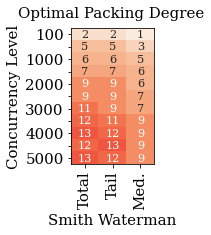

In [3]:
#prediction for both  (cost and time) propack --smithwaterman
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pylab as mp
import statistics 
from matplotlib import gridspec
import statistics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from matplotlib import rcParams
import numpy as np
cost_of_lambda=0.0001667 ##lambda cost per sec 10 GB
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Roboto']


with open(r'/home/rohan/Downloads/scaling/sc/exp1/smithwaterman/scale_time.txt') as f:
    statelesscost_scale=[float(x.strip()) for x in f.readlines()]
with open(r'/home/rohan/Downloads/scaling/sc/exp1/sort/scale_time.txt') as f:
    sort_scale=[float(x.strip()) for x in f.readlines()]
with open(r'/home/rohan/Downloads/scaling/sc/exp1/video/scale_time.txt') as f:
    video_scale=[float(x.strip()) for x in f.readlines()]
concurrency_list=[100,500,1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
scaling_time=[statistics.median([statelesscost_scale[i],sort_scale[i],video_scale[i]]) for i in range(len(sort_scale))]
degree=4
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(np.array(concurrency_list).reshape((-1, 1)), np.array(scaling_time))

appname=['smithwaterman']
n_max=[35]
prediction_list=[100,500,1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
app_pred_list=[[] for i in range(len(appname))]
for app in appname:
    with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/'+app+'/parallel.txt') as f:
                    parallel=[float(x.strip()) for x in f.readlines()]
    with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/'+app+'/service_time.txt') as f:
                    service=[float(x.strip()) for x in f.readlines()]
    for curr in prediction_list:
        median=int(curr/2.0)
        tail=int(0.90*curr)
        net=curr
        metric_list=[net, tail, median]
        for m in metric_list:
            i=1
            ll_cost=[]
            ll_time=[] ##
            while i <= n_max[appname.index(app)]:
                scale=int(m/i)
                if m%i !=0:
                    scale+=1
                pred=polyreg.predict(np.array([scale]).reshape((-1,1)))  
                if pred<0:
                    pred=0
                service_time=service[parallel.index(i)]
                
                if m%i==0:##
                    cost_cost=service_time*scale*cost_of_lambda ##
                else: ##
                    cost_cost=service_time*(scale+1)*cost_of_lambda ##
                ll_time.append(service_time+pred)##
                ll_cost.append(cost_cost)##
                i+=1
                
            ll_opt=[0.55*((ll_cost[s]-min(ll_cost))/min(ll_cost))+0.45*((ll_time[s]-min(ll_time))/min(ll_time)) for s in range(len(ll_cost))]    
            #a=ll_cost[ll_time.index(min(ll_time))]##
            #b=min(ll_cost)##
            #if 100*(a-b)/a <1 and 100*(a-b)/a > 0:##
            #    app_pred_list[appname.index(app)].append(1)##
            #else:##
            #    app_pred_list[appname.index(app)].append(int(100*(a-b)/a))##
                
            app_pred_list[appname.index(app)].append(ll_opt.index(min(ll_opt))+1)
            
        
        
#plotting part
prediction_list=[100,'',1000, '', 2000, '', 3000, '', 4000, '', 5000]
metric_list=['Total', 'Tail', 'Med.']
appname=['Smith Waterman']
max_packing=[40, 15, 30]
fig = plt.figure(figsize=(1.5, 2.5)) 

#v_max=[max(i) for i in app_pred_list]
#v_min=[min(i) for i in app_pred_list]

v_max=[35]
v_min=[1]

j=0
while j < len(appname):
    pred_list=np.asarray(app_pred_list[j])
    pred_data=np.reshape(pred_list,(len(prediction_list),len(metric_list)))
    ax = plt.subplot(1, len(appname),j+1)
    cmap = sns.cm.rocket_r
    res=sns.heatmap(pred_data,linewidth=0.0,cbar=False, cmap=cmap, annot=True, annot_kws={"size": 11.25},vmin=v_min[j], vmax=v_max[j])
    for _, spine in res.spines.items():
        spine.set_visible(True)
    ax.set_axisbelow(True)
    if j==0:
        ax.set_ylabel("Concurrency Level",fontsize=15)
        ax.set_yticklabels([i for i in prediction_list], rotation=360)
    else:
        ax.set_yticklabels([])
        ax.set_yticks([])
    #if j==int(len(appname)/2):
    #    ax.set_xlabel("Service Time",fontsize=15)
    ax.set_xlabel(appname[j], fontsize=15, y=-0.2)
    ax.set_xticklabels(metric_list, rotation=90, fontsize=15)
    ax.tick_params(labelsize=15)
    #ax.set_title(appname[j]+"\n Max. Pack.\nDeg. "+str(max_packing[j]))
    j+=1
plt.suptitle("Optimal Packing Degree", fontsize=15, y=1)

#mp.savefig(r'/home/rohan/Downloads/scaling/sc/figures/spatial_both.pdf', bbox_inches='tight')

In [ ]:
#smithwaterman performance



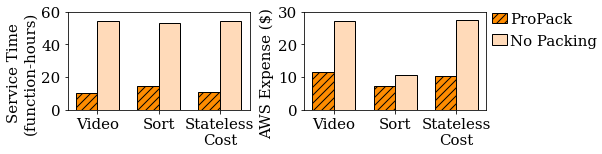

In [174]:
#absolute improvement

single_time=[97.79312944412231,95.18989562988281,97.71951699256897]
propack_time=[17.97569465637207,25.94994592666626,19.600144624710083]

single_cost=[0.9051231633464821,0.3501923340274563,0.9124014549897902]
propack_cost=[0.3847214343621493,0.23868476371227307,0.3408780660395861]



import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
import numpy as np
from matplotlib import rcParams
import math
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Roboto']

fig = mp.figure(figsize=(7.5,1.8))
barWidth = 0.35
mp.subplots_adjust(wspace=0.3, hspace=0.3)
plt.rc('axes', axisbelow=True)
r1 = np.arange(len(single_time))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]





ax1 = mp.subplot(121)
single_time=[(i*2000)/3600 for i in single_time]
propack_time=[(i*2000)/3600 for i in propack_time]
plt.bar(r1, propack_time, width = barWidth, color = 'darkorange', hatch='///' ,edgecolor = 'black',capsize=15)
plt.bar(r2, single_time, width = barWidth, color = 'peachpuff', edgecolor = 'black',capsize=15)
ax1.set_axisbelow(True)
ax1.set_ylabel("Service Time\n(function-hours)",fontsize=15,y=0.38)
#ax1.set_xlabel("Concurrency Level",fontsize=15)
ax1.set_xticks([0.175,1.175,2.175])
ax1.set_xticklabels(['Video','Sort', 'Stateless\nCost'], rotation=0)
ax1.tick_params(labelsize=15)
#ax1.set_yticks([0,20,40])
#ax1.set_xlabel("Concurrency Level", fontsize=15)
ax1.set_yticks([0,20,40,60])




ax1 = mp.subplot(122)
single_cost=[i*30 for i in single_cost]
propack_cost=[i*30 for i in propack_cost]
plt.bar(r1, propack_cost, width = barWidth, color = 'darkorange', hatch='///' ,edgecolor = 'black',capsize=15, label='ProPack')
plt.bar(r2, single_cost, width = barWidth, color = 'peachpuff', edgecolor = 'black',capsize=15, label='No Packing')
ax1.set_axisbelow(True)
ax1.set_ylabel("AWS Expense ($)",fontsize=15,y=0.38)
#ax1.set_xlabel("Concurrency Level",fontsize=15)
ax1.set_xticks([0.175,1.175,2.175])
ax1.set_xticklabels(['Video','Sort', 'Stateless\nCost'], rotation=0)
ax1.tick_params(labelsize=15)
#ax1.set_yticks([0,20,40])
#ax1.set_xlabel("Concurrency Level", fontsize=15)
ax1.set_yticks([0,10,20,30])


ax1.legend(loc=3,mode='expand',handlelength=1,handletextpad=0.2,  bbox_to_anchor=(1,0.57,0.6,1.),ncol=1,fontsize=15, borderaxespad=0, frameon=False)
mp.savefig(r'/home/rohan/Downloads/scaling/sc/figures/absolute_val.pdf', bbox_inches='tight')

In [28]:
propack_cost

[11.541643030864478, 7.160542911368192, 10.226341981187582]

[59.24800463282733, 59.21793222301773, 59.742439065771336]


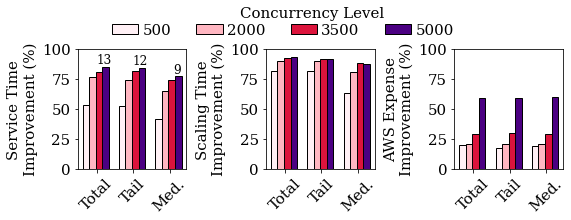

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
import numpy as np
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Roboto']

fig = mp.figure(figsize=(4.35*2,2.2))
mp.subplots_adjust(wspace=0.73)
barWidth = 0.18
m_list=["Total", "Tail", "Med."]
a_name=["Video", "Sort", "Stateless Cost"]

#exploration_cost

with open(r'/home/rohan/Downloads/scaling/sc/packing_delay/smithwaterman/service_time.txt') as f:
    smithwaterman=[float(x.strip()) for x in f.readlines()]
exploration_cost=sum(smithwaterman)*0.0001667

app='smithwaterman'
metrics=['net', 'tail', 'median']
predicted_concurrency=[500,2000, 3500, 5000]


num_smith=[[5,5,3],[9,9,6],[12,11,9],[13,12,9]]
qq=0

def get_text(app, splot, ax1, con_val):
        qq=0
        for rect in splot:
            height = rect.get_height()
            ax1.text(rect.get_x() + rect.get_width()/4, 1.01*height,'%d' % int(num_smith[con_val][qq]),fontsize=12,ha='center', va='bottom')
            qq+=1
            
            
scale_plot_list=[[] for i in range(len(predicted_concurrency))]
service_plot_list=[[] for i in range(len(predicted_concurrency))]
cost_plot_list=[[] for i in range(len(predicted_concurrency))]
for curr in predicted_concurrency:
    for m in metrics:        
        filename_1="/home/rohan/Downloads/scaling/sc/packed_performance/both/"+app+"/"+m+"/final_output_"+str(curr)+"_1.txt"
        filename_opt="/home/rohan/Downloads/scaling/sc/packed_performance/both/"+app+"/"+m+"/final_output_"+str(curr)+"_optima.txt"
        with open(filename_1) as f:
            newlist=[float(x.strip()) for x in f.readlines()]
            scale_1=newlist[0]
            service_1=newlist[1]
            cost_1=newlist[2]
        with open(filename_opt) as f:
            newlist=[float(x.strip()) for x in f.readlines()]
            scale_opt=newlist[0]
            service_opt=newlist[1]
            cost_opt=newlist[2]+exploration_cost
                
        scale_per=(1-(scale_opt/scale_1))*100
        service_per=(1-(service_opt/service_1))*100
        cost_per=(1-(cost_1/cost_opt))*100 ##
            
        scale_plot_list[predicted_concurrency.index(curr)].append(scale_per)
        service_plot_list[predicted_concurrency.index(curr)].append(service_per)
        cost_plot_list[predicted_concurrency.index(curr)].append(cost_per)
        expense_plot_list=[cost_plot_list[3],cost_plot_list[2], cost_plot_list[1], cost_plot_list[0]]

for i in range(3):
    ax1 = mp.subplot(1,3,i+1)
    r1 = np.arange(len(service_plot_list[0]))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]
    #print(service_plot_list)
    if i==0:
        splot1=plt.bar(r1, service_plot_list[0], width = barWidth, color = 'lavenderblush', edgecolor = 'black',capsize=15, label='500')
        splot2=plt.bar(r2, service_plot_list[1], width = barWidth, color = 'lightpink', edgecolor = 'black',capsize=15, label='2000')
        splot3=plt.bar(r3, service_plot_list[2], width = barWidth, color = 'crimson', edgecolor = 'black',capsize=15, label='3500')
        splot4=plt.bar(r4, service_plot_list[3], width = barWidth, color = 'indigo', edgecolor = 'black', capsize=15, label='5000')
        
        get_text(app, splot4, ax1,3)

    if i==1:
        plt.bar(r1, scale_plot_list[0], width = barWidth, color = 'lavenderblush', edgecolor = 'black',capsize=15, label='500')
        plt.bar(r2, scale_plot_list[1], width = barWidth, color = 'lightpink', edgecolor = 'black',capsize=15, label='2000')
        plt.bar(r3, scale_plot_list[2], width = barWidth, color = 'crimson', edgecolor = 'black',capsize=15, label='3500')
        plt.bar(r4, scale_plot_list[3], width = barWidth, color = 'indigo', edgecolor = 'black', capsize=15, label='5000')
    if i==2:
        plt.bar(r1, expense_plot_list[0], width = barWidth, color = 'lavenderblush', edgecolor = 'black',capsize=15, label='500')
        plt.bar(r2, expense_plot_list[1], width = barWidth, color = 'lightpink', edgecolor = 'black',capsize=15, label='2000')
        plt.bar(r3, expense_plot_list[2], width = barWidth, color = 'crimson', edgecolor = 'black',capsize=15, label='3500')
        plt.bar(r4, expense_plot_list[3], width = barWidth, color = 'indigo', edgecolor = 'black', capsize=15, label='5000')
        print(expense_plot_list[3])
    
    
    ax1.set_axisbelow(True)   
    
    if i==0:
        ax1.set_ylabel("Service Time\nImprovement (%)",fontsize=15)
    if i==1:
        ax1.set_ylabel("Scaling Time\nImprovement (%)",fontsize=15)    
    if i==2:
        ax1.set_ylabel("AWS Expense\nImprovement (%)",fontsize=15)
    
    ax1.set_xticks([i+0.3 for i in range(len(m_list))])
    ax1.set_xticklabels(m_list, rotation=45)
    ax1.tick_params(labelsize=15)
    #ax1.set_title(a_name[appname.index(app)], y=1, fontsize=15)
    ax1.set_ylim([10,100])
    ax1.set_yticks([0,25,50,75,100])

ax1.legend(loc=3,mode='expand',handlelength=1.75,handletextpad=0.3,  bbox_to_anchor=(-3.2,1.05,3.25,1.),ncol=4,fontsize=15, borderaxespad=0, frameon=False)
plt.suptitle("Concurrency Level", fontsize=15, y=1.15, x=0.5)  
mp.savefig(r'/home/rohan/Downloads/scaling/sc/figures/smithwaterman.pdf', bbox_inches='tight')

In [131]:
(84+84+77)/3

81.66666666666667

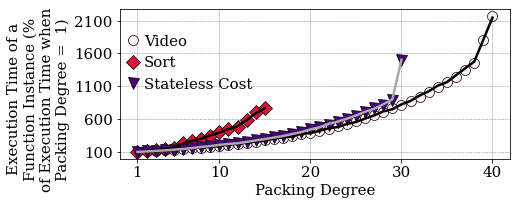

In [172]:
##with analytical models

#sensitivity w.r.t packing degree
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
import numpy as np
from matplotlib import rcParams
import math
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Roboto']

p1=0.111
p2=0.23
p3=0.12

with open(r'/home/rohan/Downloads/scaling/packing_delay/video/service_time.txt') as f:
    video=[float(x.strip()) for x in f.readlines()]
video.reverse()
with open(r'/home/rohan/Downloads/scaling/packing_delay/sort/service_time.txt') as f:
    sort=[float(x.strip()) for x in f.readlines()]
sort.reverse()
with open(r'/home/rohan/Downloads/scaling/packing_delay/statelesscost/service_time.txt') as f:
    statelesscost=[float(x.strip()) for x in f.readlines()]
statelesscost.reverse()
statelesscost=[i+2 for i in statelesscost] #

video=[math.exp(p1*i) for i in video] #
sort=[math.exp(p2*i) for i in sort]   #
statelesscost=[math.exp(p3*i) for i  in statelesscost]  #

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth



video=[(i/min(video))*100 for i in video]
sort=[(i/min(sort))*100 for i in sort]
statelesscost=[(i/min(statelesscost))*100 for i in statelesscost]

video_list=[98.64039705929888, 109.01360983345754, 113.26338758874587, 122.30283275183956, 135.9360388530702, 147.29226888107155, 156.4500742175965, 169.80736179958416, 173.85253250903898, 190.04732163625587, 212.28760320802812, 220.26101249496753, 239.88326460746535, 256.62366835107116, 269.47837021400204, 302.46820603539453, 323.9542569625868, 334.718810975863, 376.6766220933835, 386.5665490113118, 421.4049719063845, 459.22651638089656, 478.6633165842622, 524.9113773787922, 555.6877982924232, 607.9572923906753, 655.854285191515, 716.6237982205586, 750.1539601858996, 824.064230262114, 876.8117180193028, 959.9772955320497, 1023.7040536389452, 1111.0225371651534, 1163.626895660424, 1269.6174077436972, 1373.9172166765281, 1476.2407311468996, 1811.5182285815497, 2146.4350392219217]
sort_list=[100.48355650700431, 111.67568841688038, 131.98946791177323, 141.8516116814817, 163.19033471499924, 228.984726356708, 270.36332538121917, 300.24535720162515, 351.93655166708874, 394.67559866912734, 445.56683241829234, 489.9438665525538, 580.9539890685244, 688.1314131190314, 764.2569908576819]

random.uniform(1,-1)

random.uniform(1,-1)
# curve_fit_video = np.polyfit(np.log([i+1 for i in range(len(video))]),np.log(video),3)
# curve_video= [curve_fit_video[0]*math.exp(curve_fit_video[1]*x) for x in [i+1 for i in range(len(video))]]

fig = mp.figure(figsize=(7,2.75))
plt.rc('axes', axisbelow=True)
ax1 = mp.subplot(111)
mp.plot(video, marker='o',markerfacecolor='lavenderblush',markeredgecolor='black', markeredgewidth=0.7,markersize=10, linewidth=1.5, linestyle='', color='black', label='Video')
mp.plot(sort, marker='D',markerfacecolor='crimson',markeredgecolor='black', markeredgewidth=0.75,markersize=10, linewidth=1.5, linestyle='', color='black', label='Sort')
mp.plot(statelesscost, marker='v',markerfacecolor='indigo',markeredgecolor='black', markeredgewidth=0.75,markersize=11, linewidth=1.5, linestyle='', color='black', label='Stateless Cost')

mp.plot(smooth(video_list,1), color='black', linewidth=2.5, linestyle='-')
mp.plot(smooth(sort_list,1), color='black', linewidth=2.5, linestyle='-')
mp.plot(smooth(statelesscost_list,1), color='darkgray', linewidth=2.5, linestyle='-')


#plt.grid(color='gray', linestyle='--', linewidth=0.5)

ax1.set_axisbelow(True)
ax1.set_ylabel("Execution Time of a\nFunction Instance (%\nof Execution Time when\nPacking Degree =  1)",fontsize=15,y=0.4)
ax1.set_xlabel("Packing Degree",fontsize=15)
ax1.set_xticks([0, 9, 19, 29, 39])
#plt.xticks(np.arange(0, len(video), 2.0))

x=[i+1 if (i+1)%10==0 or i+1==1 else "" for i in range(len(video))]
ax1.set_xticklabels(['1', '10', '20', '30', '40'], rotation=0)
ax1.tick_params(labelsize=15)
ax1.set_yticks([100, 600, 1100, 1600, 2100])
plt.grid(linestyle='--', color='grey', linewidth=0.5)

ax1.legend(loc=3,mode='expand',handlelength=1,handletextpad=0.2,  bbox_to_anchor=(-0.0,0.41,0.65,1.),ncol=1,fontsize=15, borderaxespad=0, frameon=False)
mp.savefig(r'/home/rohan/Downloads/scaling/sc/figures/runtime_with_analytical.pdf', bbox_inches='tight')

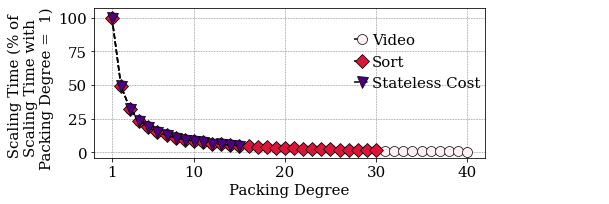

In [212]:
## scaling time with packing degree
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
import numpy as np
from matplotlib import rcParams
import math
import random
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Roboto']

def calc_time(x):
    y=0.0000*x**2 + 0.0450*x - 4.1321
    return y

main_list=[]
concurrency=5000
pd_list=[40,30,15]
for pd_max in pd_list:
    in_list=[]
    pd=1
    while pd<=pd_max:
        res=calc_time(int(concurrency/pd))
        if res <0:
            in_list.append(random.uniform(0,0.5))
        else:
            in_list.append(res)
        pd+=1
    in_list=[100*k/max(in_list) for k in in_list]
    main_list.append(in_list)
    


fig = mp.figure(figsize=(7,2.75))
plt.rc('axes', axisbelow=True)
ax1 = mp.subplot(111)
mp.plot(main_list[0], marker='o',markerfacecolor='lavenderblush',markeredgecolor='black', markeredgewidth=0.7,markersize=10, linewidth=1.5, linestyle='--', color='black', label='Video')
mp.plot(main_list[1], marker='D',markerfacecolor='crimson',markeredgecolor='black', markeredgewidth=0.75,markersize=10, linewidth=1.5, linestyle='--', color='black', label='Sort')
mp.plot(main_list[2], marker='v',markerfacecolor='indigo',markeredgecolor='black', markeredgewidth=0.75,markersize=11, linewidth=1.5, linestyle='--', color='black', label='Stateless Cost')



ax1.set_axisbelow(True)
ax1.set_ylabel(" Scaling Time (% of\nScaling Time with\nPacking Degree =  1)",fontsize=15, y=0.47)
ax1.set_xlabel("Packing Degree",fontsize=15)
ax1.set_xticks([0, 9, 19, 29, 39])
#plt.xticks(np.arange(0, len(video), 2.0))

x=[i+1 if (i+1)%10==0 or i+1==1 else "" for i in range(len(video))]
ax1.set_xticklabels(['1', '10', '20', '30', '40'], rotation=0)
ax1.tick_params(labelsize=15)
ax1.set_yticks([100, 75, 50, 25, 0])
ax1.set_ylim([-4, 107])
plt.grid(linestyle='--', color='grey', linewidth=0.5)

ax1.legend(loc=3,mode='expand',handlelength=1,handletextpad=0.2,  bbox_to_anchor=(0.65,0.41,0.65,1.),ncol=1,fontsize=15, borderaxespad=0, frameon=False)
mp.savefig(r'/home/rohan/Downloads/scaling/sc/figures/scaling_pd.pdf', bbox_inches='tight')